# Possible to-do's:

1. Aligned sequence analysis:
    - Fetch full protein sequences
    - Align
    - Check the numbering of SNPs (with or without the signal peptide?)
    - Assign SNPs to the meta-sequence
    - Assign the structural segments to the meta-sequence
    - Profit...

# GonmAD analysis

In [43]:
from pathlib import Path
import os
import pandas

In [44]:
from matplotlib import pyplot
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")
matplotlib.rcParams["figure.figsize"] = (10, 10)

In [45]:
_folder_path = Path() / "Raw_data"
_raw_files = [x for x in os.listdir(_folder_path) if os.path.isfile(_folder_path / x)]
_alternative_raw = [file for file in _raw_files if "2.1.1" in file]
_raw_files = list(set(_raw_files) - set(_alternative_raw))
print(_raw_files)

['gnomAD_v3.1.2_ENSG00000174343_2021_10_26_19_00_26_CHRNA9.csv', 'gnomAD_v3.1.2_ENSG00000147432_2021_10_26_19_03_23_CHRNB3.csv', 'gnomAD_v3.1.1_ENSG00000138435_2021_09_06_14_24_13_CHRNA1.csv', 'gnomAD_v3.1.1_ENSG00000151834_2021_08_25_17_49_15_GABRA2.csv', 'gnomAD_v3.1.1_ENSG00000169684_2021_09_06_15_12_03_CHRNA5.csv', 'gnomAD_v3.1.1_ENSG00000163285_2021_08_25_17_51_58_GABRG1.csv', 'gnomAD_v3.1.1_ENSG00000109158_2021_08_25_17_49_50_GABRA4.csv', 'gnomAD_v3.1.2_ENSG00000129749_2021_10_26_19_01_13_CHRNA10.csv', 'gnomAD_v3.1.1_ENSG00000101958_2021_08_26_22_07_30_GLRA2.csv', 'gnomAD_v3.1.1_ENSG00000022355_2021_08_25_17_45_26_GABRA1.csv', 'gnomAD_v3.1.2_ENSG00000117971_2021_10_26_19_03_47_CHRNB4.csv', 'gnomAD_v3.1.1_ENSG00000186297_2021_08_25_17_50_11_GABRA5.csv', 'gnomAD_v3.1.1_ENSG00000146276_2021_08_25_17_54_23_GABRR1.csv', 'gnomAD_v3.1.2_ENSG00000196811_2021_10_26_19_04_10_CHRNG.csv', 'gnomAD_v3.1.1_ENSG00000186090_2021_08_25_17_57_26_5HT3D.csv', 'gnomAD_v3.1.1_ENSG00000178084_2021_08_25

## Importing the files
We import the file as pandas DataFrame and add a column in which we track the gene of interest.

In [46]:
data = []
for file in _raw_files:
    data.append(pandas.read_csv(_folder_path / file))
    data[-1]["Gene"] = file.split(".")[-2].split("_")[-1]
data_alternative = []
for file in _alternative_raw:
    data_alternative.append(pandas.read_csv(_folder_path / file))
    data_alternative[-1]["Gene"] = file.split(".")[-2].split("_")[-1]

In [47]:
data[0]

,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,HGVS Consequence,...,Hemizygote Count South Asian,Allele Count Ashkenazi Jewish,Allele Number Ashkenazi Jewish,Homozygote Count Ashkenazi Jewish,Hemizygote Count Ashkenazi Jewish,Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Gene
0,4,40335393,rs1476989489,T,A,gnomAD Genomes,NaN,PASS,ENST00000310169.3,c.-75T>A,...,0,0,3472,0,0,1,68036,0,0,CHRNA9
1,4,40335394,rs914384884,C,G,gnomAD Genomes,NaN,PASS,ENST00000310169.3,c.-74C>G,...,0,0,3472,0,0,0,68048,0,0,CHRNA9
2,4,40335395,NaN,C,T,gnomAD Genomes,NaN,PASS,ENST00000310169.3,c.-73C>T,...,0,0,3472,0,0,0,68038,0,0,CHRNA9
3,4,40335398,rs1476594919,T,C,gnomAD Genomes,NaN,PASS,ENST00000310169.3,c.-70T>C,...,0,0,3468,0,0,2,68038,0,0,CHRNA9
4,4,40335406,rs148280950,T,C,gnomAD Genomes,NaN,PASS,ENST00000310169.3,c.-62T>C,...,0,0,3470,0,0,13,68042,0,0,CHRNA9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,4,40354581,NaN,A,C,gnomAD Genomes,NaN,PASS,ENST00000310169.3,c.*61A>C,...,0,0,3472,0,0,0,68050,0,0,CHRNA9
484,4,40354582,rs1003330176,A,G,gnomAD Genomes,NaN,PASS,ENST00000310169.3,c.*62A>G,...,0,0,3472,0,0,0,68028,0,0,CHRNA9
485,4,40354584,rs566123376,G,A,gnomAD Genomes,NaN,PASS,ENST00000310169.3,c.*64G>A,...,0,0,3472,0,0,0,68030,0,0,CHRNA9
486,4,40354588,rs1279500682,T,G,gnomAD Genomes,NaN,PASS,ENST00000310169.3,c.*68T>G,...,0,0,3470,0,0,0,68042,0,0,CHRNA9


In [48]:
print(*list(data[0].columns), sep="\n")

Chromosome
Position
rsIDs
Reference
Alternate
Source
Filters - exomes
Filters - genomes
Transcript
HGVS Consequence
Protein Consequence
Transcript Consequence
VEP Annotation
ClinVar Clinical Significance
ClinVar Variation ID
Flags
Allele Count
Allele Number
Allele Frequency
Homozygote Count
Hemizygote Count
Allele Count Other
Allele Number Other
Homozygote Count Other
Hemizygote Count Other
Allele Count Latino/Admixed American
Allele Number Latino/Admixed American
Homozygote Count Latino/Admixed American
Hemizygote Count Latino/Admixed American
Allele Count European (Finnish)
Allele Number European (Finnish)
Homozygote Count European (Finnish)
Hemizygote Count European (Finnish)
Allele Count Amish
Allele Number Amish
Homozygote Count Amish
Hemizygote Count Amish
Allele Count East Asian
Allele Number East Asian
Homozygote Count East Asian
Hemizygote Count East Asian
Allele Count Middle Eastern
Allele Number Middle Eastern
Homozygote Count Middle Eastern
Hemizygote Count Middle Eastern
A

In [49]:
print(*[len(x.columns) for x in data], sep="\n")

62
62
62
61
62
61
61
62
62
61
62
61
61
62
61
61
62
62
61
61
61
62
61
62
62
62
62
62
61
61
62
62
61
62
61
61
62
61
62
61
61
61
62
62
61
61
61


Some columns are present only in a subset of files. We look at one of those below.

In [50]:
set(data[2].columns) - set(data[0].columns)

set()

In [51]:
data

[     Chromosome  Position         rsIDs Reference Alternate          Source  \
 0             4  40335393  rs1476989489         T         A  gnomAD Genomes   
 1             4  40335394   rs914384884         C         G  gnomAD Genomes   
 2             4  40335395           NaN         C         T  gnomAD Genomes   
 3             4  40335398  rs1476594919         T         C  gnomAD Genomes   
 4             4  40335406   rs148280950         T         C  gnomAD Genomes   
 ..          ...       ...           ...       ...       ...             ...   
 483           4  40354581           NaN         A         C  gnomAD Genomes   
 484           4  40354582  rs1003330176         A         G  gnomAD Genomes   
 485           4  40354584   rs566123376         G         A  gnomAD Genomes   
 486           4  40354588  rs1279500682         T         G  gnomAD Genomes   
 487           4  40354589   rs139871234         T         G  gnomAD Genomes   
 
      Filters - exomes Filters - genom

We will keep them, and introduce NaN
## Joining the datasets

In [52]:
dataset = pandas.concat(data, axis=0, join="outer", ignore_index=True)
print(dataset)
dataset_alternative = pandas.concat(data_alternative, axis=0, join="outer", ignore_index=True)

      Chromosome    Position         rsIDs Reference Alternate  \
0              4  40335393.0  rs1476989489         T         A   
1              4  40335394.0   rs914384884         C         G   
2              4  40335395.0           NaN         C         T   
3              4  40335398.0  rs1476594919         T         C   
4              4  40335406.0   rs148280950         T         C   
...          ...         ...           ...       ...       ...   
28733         15  27532935.0   rs533518478         C         T   
28734         15  27532936.0   rs894145289         G         A   
28735         15  27532939.0  rs1302250905         C         T   
28736         15  27532942.0           NaN         A         G   
28737         15  27532953.0  rs1329965545         G         A   

               Source  Filters - exomes Filters - genomes         Transcript  \
0      gnomAD Genomes               NaN              PASS  ENST00000310169.3   
1      gnomAD Genomes               NaN        

## Exploring the total dataset
### Different polymorphism annotations
For a complete description of the effect annotations see [the ensembl description](https://www.ensembl.org/info/genome/variation/prediction/predicted_data.html).

In [53]:
dataset["VEP Annotation"].unique()

array(['5_prime_UTR_variant', 'synonymous_variant', 'stop_gained',
       'missense_variant', 'splice_region_variant', 'intron_variant',
       'frameshift_variant', 'inframe_deletion', 'inframe_insertion',
       '3_prime_UTR_variant', 'start_lost', 'splice_donor_variant',
       'splice_acceptor_variant', 'stop_retained_variant', nan,
       'protein_altering_variant', 'stop_lost'], dtype=object)

In [54]:
_VEPs = ["missense_variant",
         "stop_gained",
         "splice_acceptor_variant",
         "splice_donor_variant",
         "frameshift_variant",
         "inframe_deletion",
         "inframe_insertion",
         "start_lost",
         "stop_lost",
         "protein_altering_variant"]
print(*[sum(dataset["VEP Annotation"] == x) for x in _VEPs], sep="\n")

8518
299
93
126
451
141
41
36
11
2


In [55]:
dataset.shape

(28738, 62)

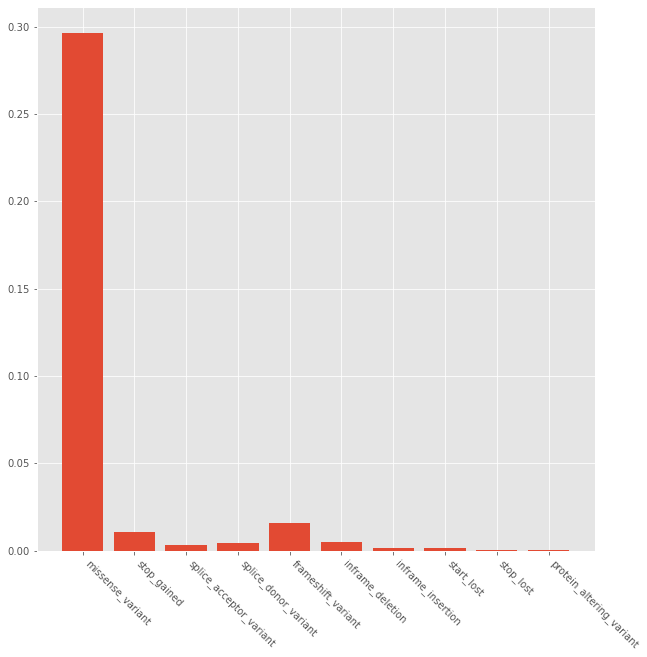

In [56]:
pyplot.bar(_VEPs, [sum(dataset["VEP Annotation"] == x)/dataset.shape[0]  for x in _VEPs])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.show()

## Filtering
For now we filter by including only variants present in at least 0.01 % of the population.

We also retain just the columns of interest. Let's see the distribution of the annotations now.

In [57]:
subdata = dataset[dataset["Allele Count"]/dataset["Allele Number"] > 0.0001]
subdata = subdata[subdata["VEP Annotation"].isin(_VEPs)]
subdata

,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,HGVS Consequence,...,Hemizygote Count South Asian,Allele Count Ashkenazi Jewish,Allele Number Ashkenazi Jewish,Homozygote Count Ashkenazi Jewish,Hemizygote Count Ashkenazi Jewish,Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Gene
63,4,40335836.0,rs373239007,C,T,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Thr25Met,...,0.0,0.0,3468.0,0.0,0.0,1.0,68034.0,0.0,0.0,CHRNA9
72,4,40335861.0,rs561034737,G,C,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Lys33Asn,...,0.0,0.0,3470.0,0.0,0.0,0.0,68036.0,0.0,0.0,CHRNA9
90,4,40335929.0,rs144769301,T,C,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Leu56Pro,...,0.0,0.0,3466.0,0.0,0.0,3.0,68048.0,0.0,0.0,CHRNA9
138,4,40337249.0,rs534300891,C,T,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Arg84Cys,...,0.0,0.0,3470.0,0.0,0.0,0.0,68028.0,0.0,0.0,CHRNA9
152,4,40337286.0,rs10024518,G,A,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Arg96Gln,...,0.0,0.0,3472.0,0.0,0.0,7.0,68034.0,0.0,0.0,CHRNA9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28637,15,27530680.0,rs746819842,C,T,gnomAD Genomes,NaN,PASS,NaN,p.Arg160Cys,...,0.0,0.0,3466.0,0.0,0.0,3.0,68038.0,0.0,0.0,GABRG3
28639,15,27530690.0,rs535465603,G,A,gnomAD Genomes,NaN,PASS,NaN,p.Arg163Lys,...,0.0,0.0,3470.0,0.0,0.0,0.0,68024.0,0.0,0.0,GABRG3
28646,15,27530707.0,rs112947792,G,A,gnomAD Genomes,NaN,PASS,NaN,p.Val169Ile,...,0.0,8.0,3466.0,0.0,0.0,4.0,68002.0,0.0,0.0,GABRG3
28684,15,27532628.0,rs199520183,C,G,gnomAD Genomes,NaN,PASS,NaN,p.Pro384Arg,...,0.0,0.0,3468.0,0.0,0.0,14.0,68032.0,0.0,0.0,GABRG3


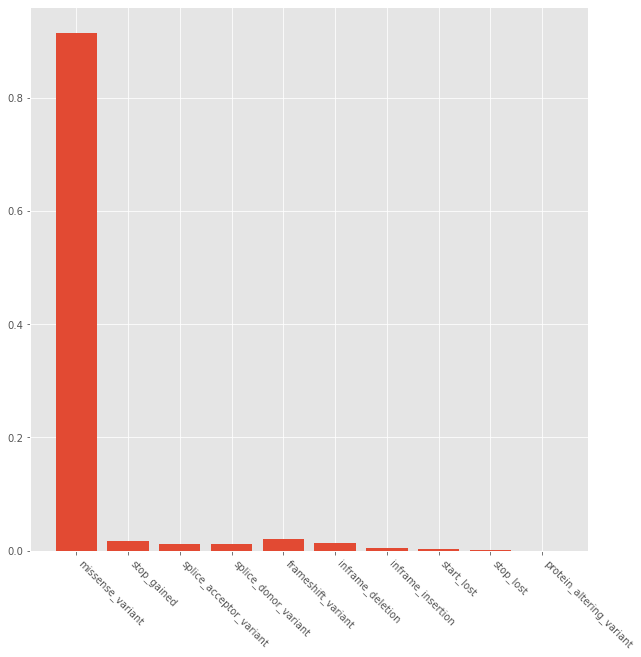

In [58]:
pyplot.bar(_VEPs, [sum(subdata["VEP Annotation"] == x)/subdata.shape[0]  for x in _VEPs])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.show()

## Distribution across the genes
First we just look at the number of different polymorphisms detected.

In [59]:
matplotlib.rcParams["figure.figsize"] = (30, 10)

In [60]:
_genes = subdata["Gene"].unique()
_values = pandas.DataFrame({"Gene": _genes, "Value": [sum(subdata["Gene"] == x)/subdata.shape[0]  for x in _genes]})
_values.sort_values(by="Value", ascending=False, inplace=True, ignore_index=True)

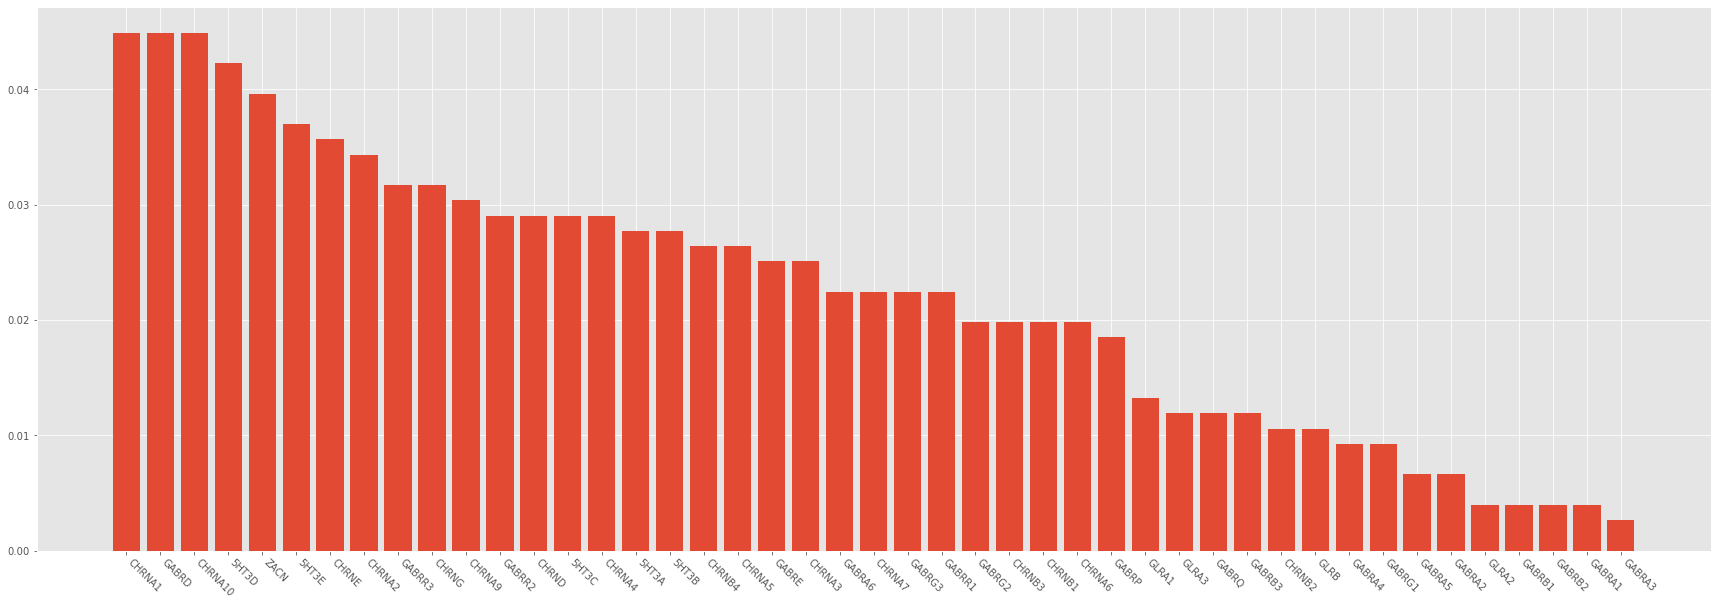

In [61]:
pyplot.bar(_values["Gene"], _values["Value"])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.show()

Now we check the total number of detected alleles. Note that the sample sizes do not match. Acutally, let us first look at how much that deviates.

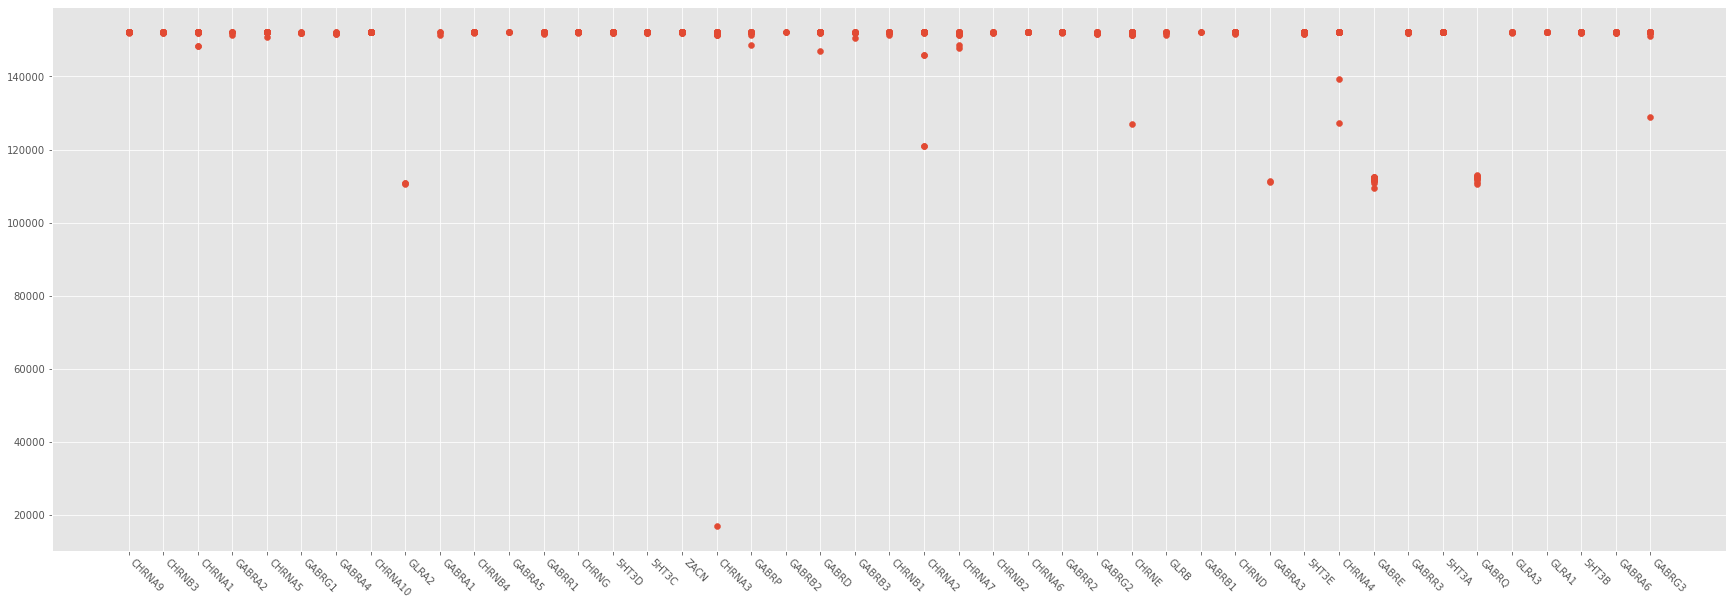

In [62]:
pyplot.scatter(subdata["Gene"], subdata["Allele Number"])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.show()

In [63]:
_values["Allele Count"] = [sum(subdata["Allele Count"][subdata["Gene"] == x]) for x in _values["Gene"]]
_values.sort_values(by="Allele Count", ascending=False, inplace=True, ignore_index=True)

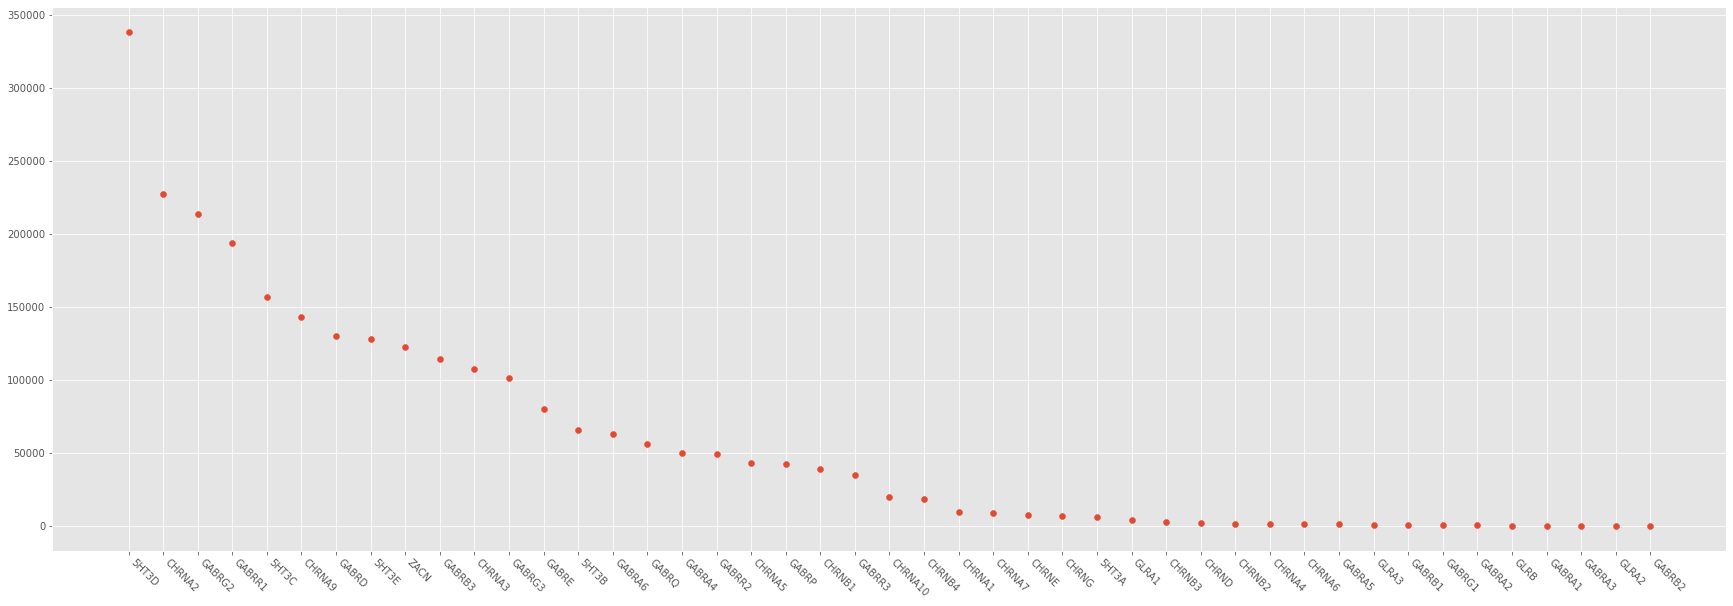

In [64]:
pyplot.scatter(_values["Gene"], _values["Allele Count"])
pyplot.xticks(rotation=-45, horizontalalignment="left")
pyplot.show()

## Extracting the AA number from missense variants
We extracted the numbering of amino acid from `Protein Sequence` column. Then we used UniProt for determining the lengths of all proteins and normalized the position of amino acids to the full protein lengths. For a more in-depth analysis we would need an alignment.

In [65]:
missense = subdata[subdata["VEP Annotation"] == "missense_variant"]
missense

,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,HGVS Consequence,...,Hemizygote Count South Asian,Allele Count Ashkenazi Jewish,Allele Number Ashkenazi Jewish,Homozygote Count Ashkenazi Jewish,Hemizygote Count Ashkenazi Jewish,Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Gene
63,4,40335836.0,rs373239007,C,T,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Thr25Met,...,0.0,0.0,3468.0,0.0,0.0,1.0,68034.0,0.0,0.0,CHRNA9
72,4,40335861.0,rs561034737,G,C,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Lys33Asn,...,0.0,0.0,3470.0,0.0,0.0,0.0,68036.0,0.0,0.0,CHRNA9
90,4,40335929.0,rs144769301,T,C,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Leu56Pro,...,0.0,0.0,3466.0,0.0,0.0,3.0,68048.0,0.0,0.0,CHRNA9
138,4,40337249.0,rs534300891,C,T,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Arg84Cys,...,0.0,0.0,3470.0,0.0,0.0,0.0,68028.0,0.0,0.0,CHRNA9
152,4,40337286.0,rs10024518,G,A,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Arg96Gln,...,0.0,0.0,3472.0,0.0,0.0,7.0,68034.0,0.0,0.0,CHRNA9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28637,15,27530680.0,rs746819842,C,T,gnomAD Genomes,NaN,PASS,NaN,p.Arg160Cys,...,0.0,0.0,3466.0,0.0,0.0,3.0,68038.0,0.0,0.0,GABRG3
28639,15,27530690.0,rs535465603,G,A,gnomAD Genomes,NaN,PASS,NaN,p.Arg163Lys,...,0.0,0.0,3470.0,0.0,0.0,0.0,68024.0,0.0,0.0,GABRG3
28646,15,27530707.0,rs112947792,G,A,gnomAD Genomes,NaN,PASS,NaN,p.Val169Ile,...,0.0,8.0,3466.0,0.0,0.0,4.0,68002.0,0.0,0.0,GABRG3
28684,15,27532628.0,rs199520183,C,G,gnomAD Genomes,NaN,PASS,NaN,p.Pro384Arg,...,0.0,0.0,3468.0,0.0,0.0,14.0,68032.0,0.0,0.0,GABRG3


In [66]:
missense["AA Number"] = missense["Protein Consequence"].str.extract(r"[a-zA-Z]([0-9]+)[a-zA-Z]").astype("int32")

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
print(*list(missense["Gene"].unique()), sep='\": \n\"')

CHRNA9": 
"CHRNB3": 
"CHRNA1": 
"GABRA2": 
"CHRNA5": 
"GABRG1": 
"GABRA4": 
"CHRNA10": 
"GLRA2": 
"GABRA1": 
"CHRNB4": 
"GABRA5": 
"GABRR1": 
"CHRNG": 
"5HT3D": 
"5HT3C": 
"ZACN": 
"CHRNA3": 
"GABRP": 
"GABRB2": 
"GABRD": 
"GABRB3": 
"CHRNB1": 
"CHRNA2": 
"CHRNA7": 
"CHRNB2": 
"CHRNA6": 
"GABRR2": 
"GABRG2": 
"CHRNE": 
"GLRB": 
"GABRB1": 
"CHRND": 
"GABRA3": 
"5HT3E": 
"CHRNA4": 
"GABRE": 
"GABRR3": 
"5HT3A": 
"GABRQ": 
"GLRA3": 
"GLRA1": 
"5HT3B": 
"GABRA6": 
"GABRG3


In [68]:
missense["AA Relative"] = 0
# Lengths are taken from UniProt
lengths = {
    "GABRA3": 492,
    "GABRA1": 456,
    "CHRNA3": 505,
    "GABRP": 440,
    "CHRNA4": 627,
    "GLRA2": 452,
    "GABRE": 506,
    "GABRA4": 554, 
    "GLRB": 497,
    "GABRR2": 465,
    "GABRG2": 467,
    "CHRNA2": 529,
    "CHRNA1": 482,
    "GLRA3": 464,
    "GABRA6": 453,
    "GABRB2": 512,
    "GLRA1": 457,
    "GABRR1": 479,
    "CHRNA6": 494,
    "5HT3B": 441,
    "GABRA2": 451,
    "GABRG1": 465,
    "GABRB1": 474,
    "GABRB3": 473,
    "5HT3A": 478,
    "CHRNA5": 468,
    "5HT3C": 447,
    "GABRG3": 467,
    "GABRR3": 467,
    "5HT3E": 456,
    "5HT3D": 454,
    "GABRA5": 462,
    "ZACN": 412,
    "GABRD": 452,
    "GABRQ": 632,
    "CHRNE": 493,
    "CHRNB4": 498,
    "CHRNA10": 450,
    "CHRND": 517,
    "CHRNB3": 458,
    "CHRNB2": 502,
    "CHRNB1": 501,
    "CHRNA9": 479,
    "CHRNA7": 502,
    "CHRNG": 517,
}
for gene in missense["Gene"].unique():
    missense["AA Relative"][missense["Gene"] == gene] = missense["AA Number"][missense["Gene"] == gene] / lengths[gene]
missense 

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,HGVS Consequence,...,Allele Number Ashkenazi Jewish,Homozygote Count Ashkenazi Jewish,Hemizygote Count Ashkenazi Jewish,Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Gene,AA Number,AA Relative
63,4,40335836.0,rs373239007,C,T,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Thr25Met,...,3468.0,0.0,0.0,1.0,68034.0,0.0,0.0,CHRNA9,25,0.052192
72,4,40335861.0,rs561034737,G,C,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Lys33Asn,...,3470.0,0.0,0.0,0.0,68036.0,0.0,0.0,CHRNA9,33,0.068894
90,4,40335929.0,rs144769301,T,C,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Leu56Pro,...,3466.0,0.0,0.0,3.0,68048.0,0.0,0.0,CHRNA9,56,0.116910
138,4,40337249.0,rs534300891,C,T,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Arg84Cys,...,3470.0,0.0,0.0,0.0,68028.0,0.0,0.0,CHRNA9,84,0.175365
152,4,40337286.0,rs10024518,G,A,gnomAD Genomes,NaN,PASS,ENST00000310169.3,p.Arg96Gln,...,3472.0,0.0,0.0,7.0,68034.0,0.0,0.0,CHRNA9,96,0.200418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28637,15,27530680.0,rs746819842,C,T,gnomAD Genomes,NaN,PASS,NaN,p.Arg160Cys,...,3466.0,0.0,0.0,3.0,68038.0,0.0,0.0,GABRG3,160,0.342612
28639,15,27530690.0,rs535465603,G,A,gnomAD Genomes,NaN,PASS,NaN,p.Arg163Lys,...,3470.0,0.0,0.0,0.0,68024.0,0.0,0.0,GABRG3,163,0.349036
28646,15,27530707.0,rs112947792,G,A,gnomAD Genomes,NaN,PASS,NaN,p.Val169Ile,...,3466.0,0.0,0.0,4.0,68002.0,0.0,0.0,GABRG3,169,0.361884
28684,15,27532628.0,rs199520183,C,G,gnomAD Genomes,NaN,PASS,NaN,p.Pro384Arg,...,3468.0,0.0,0.0,14.0,68032.0,0.0,0.0,GABRG3,384,0.822270


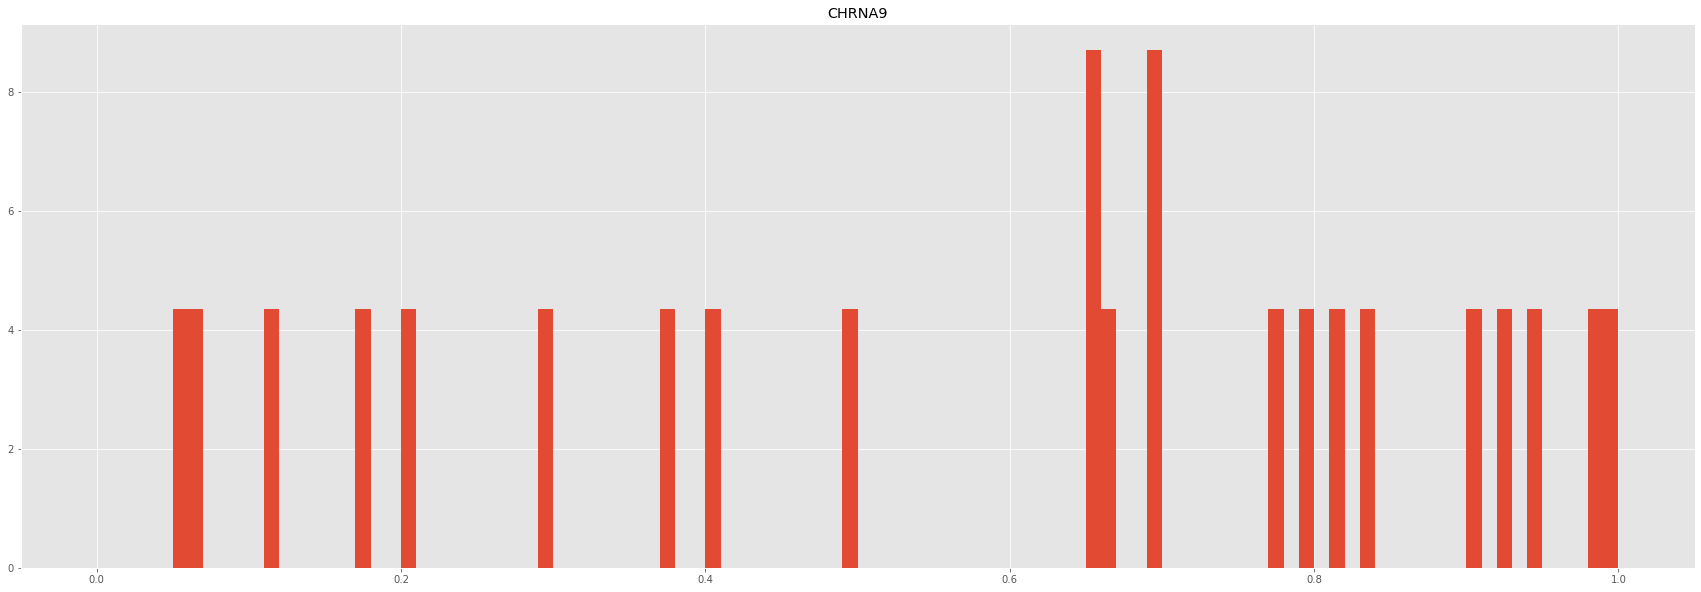

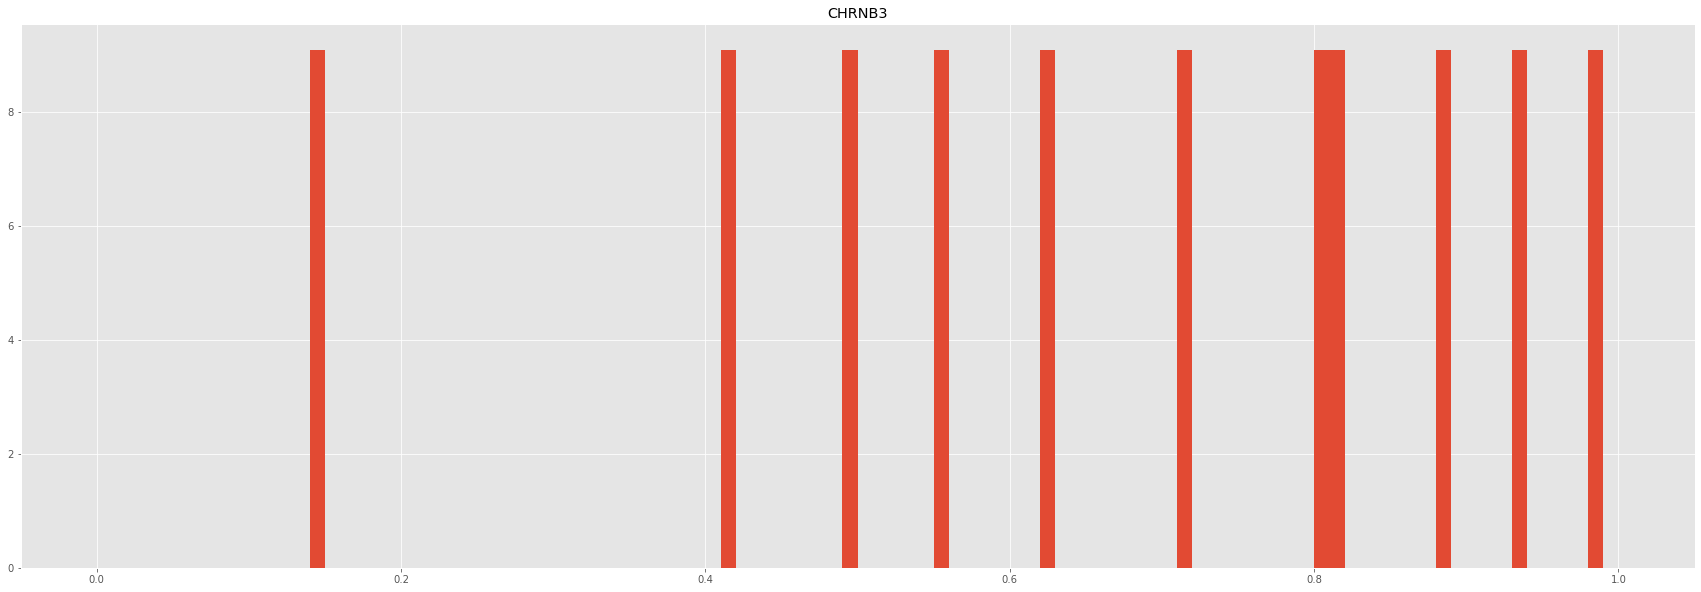

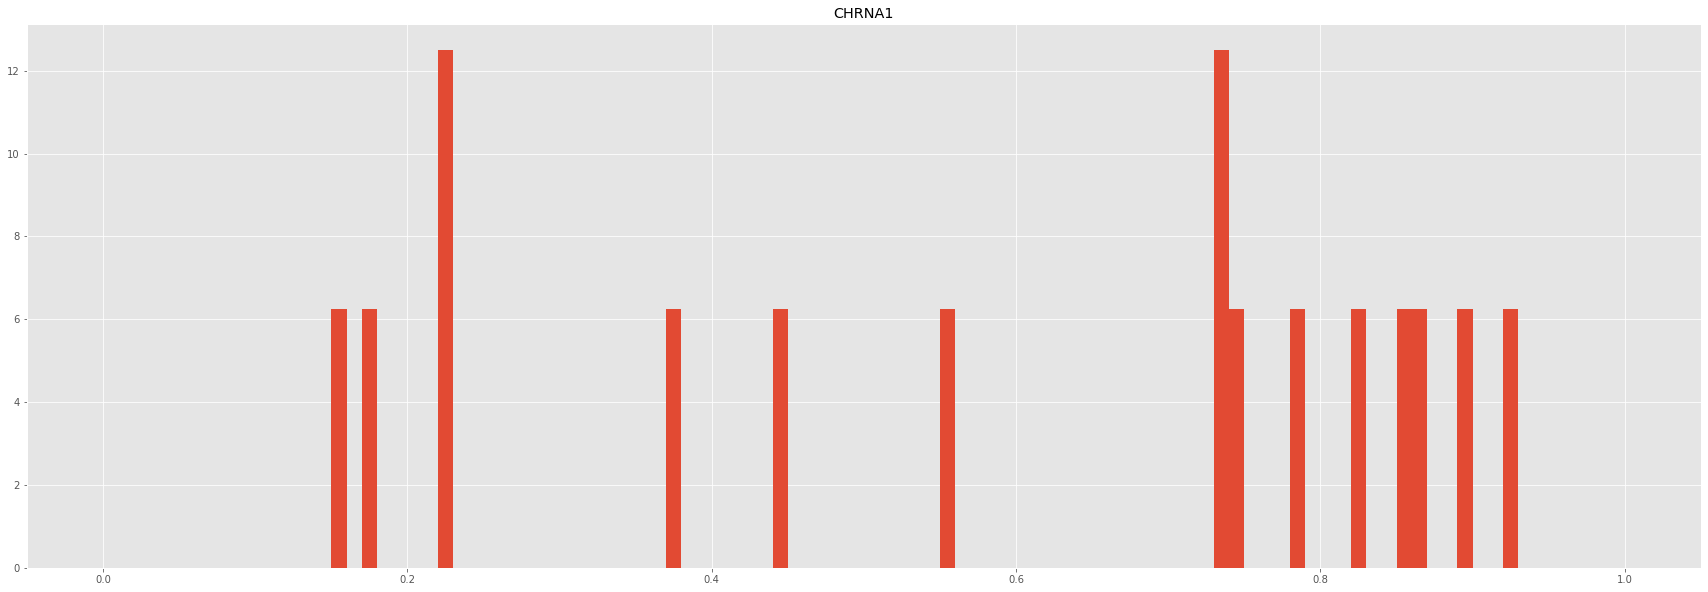

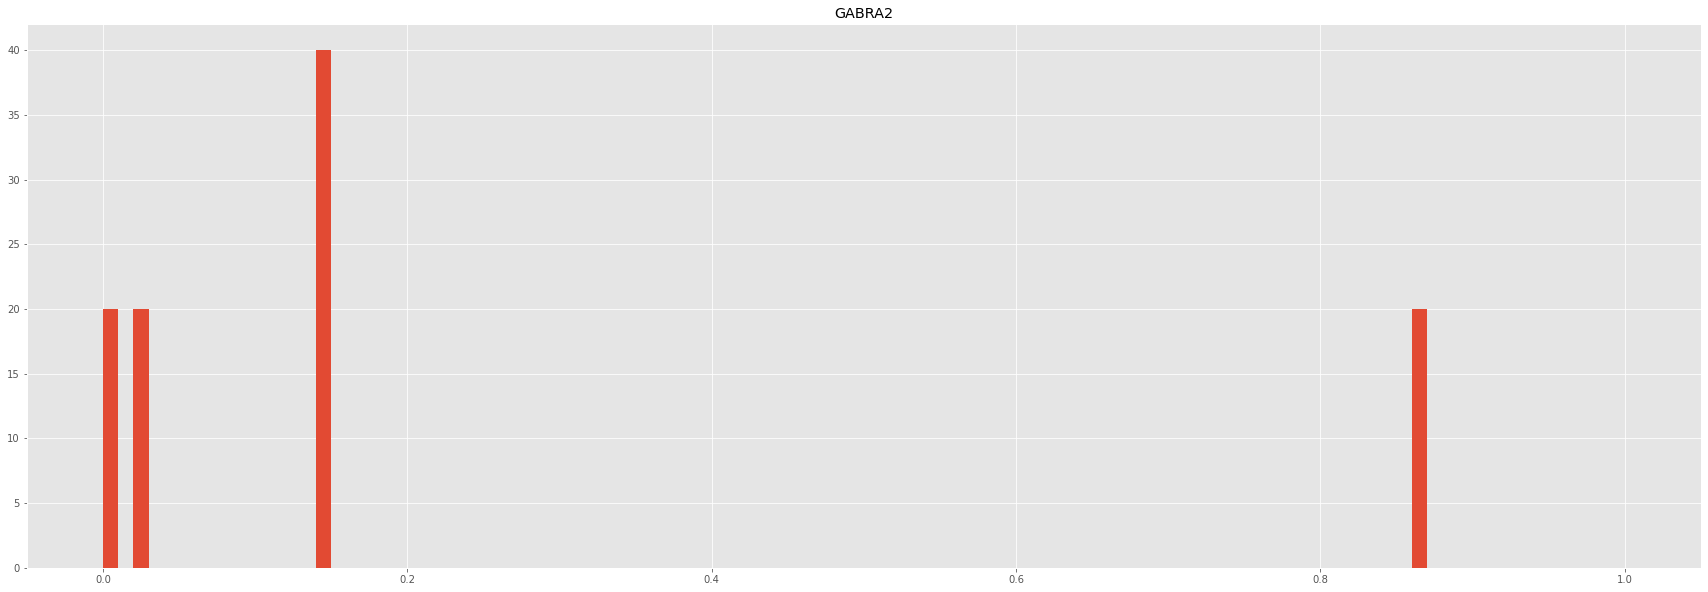

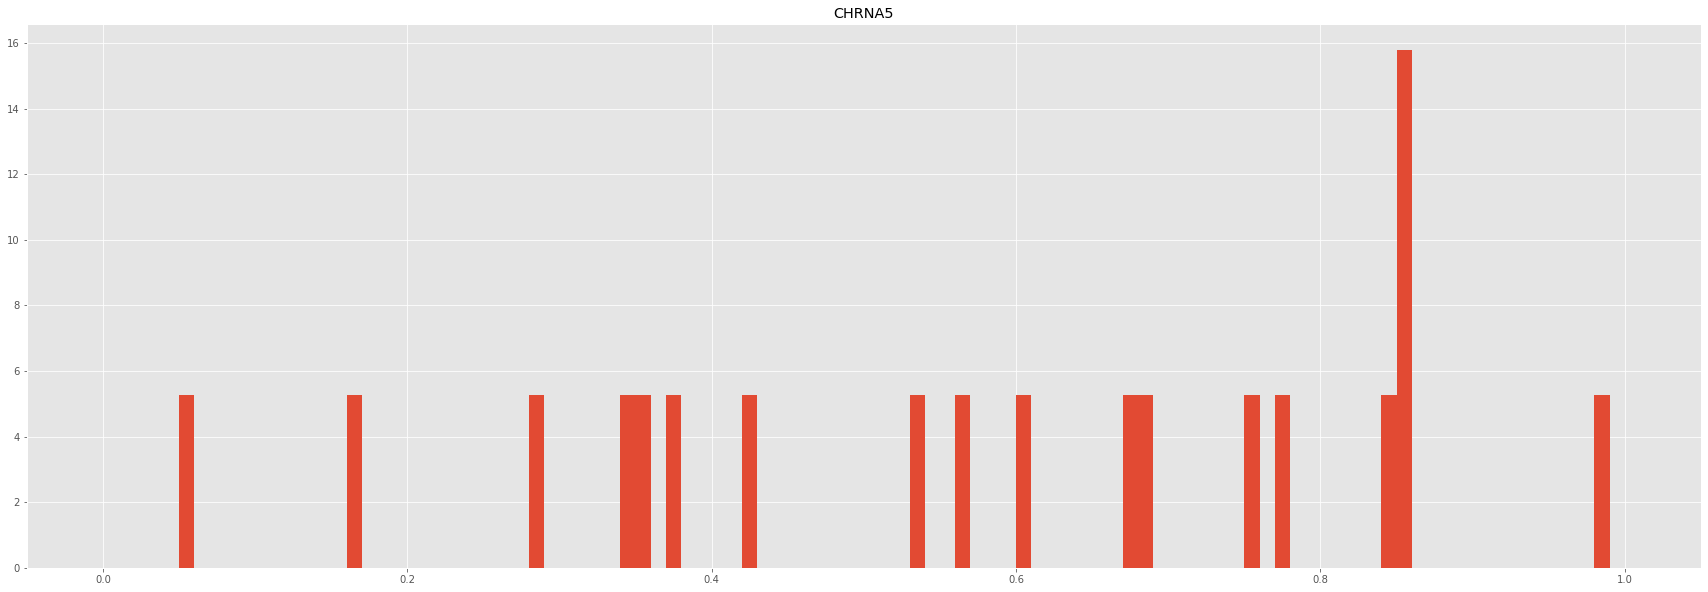

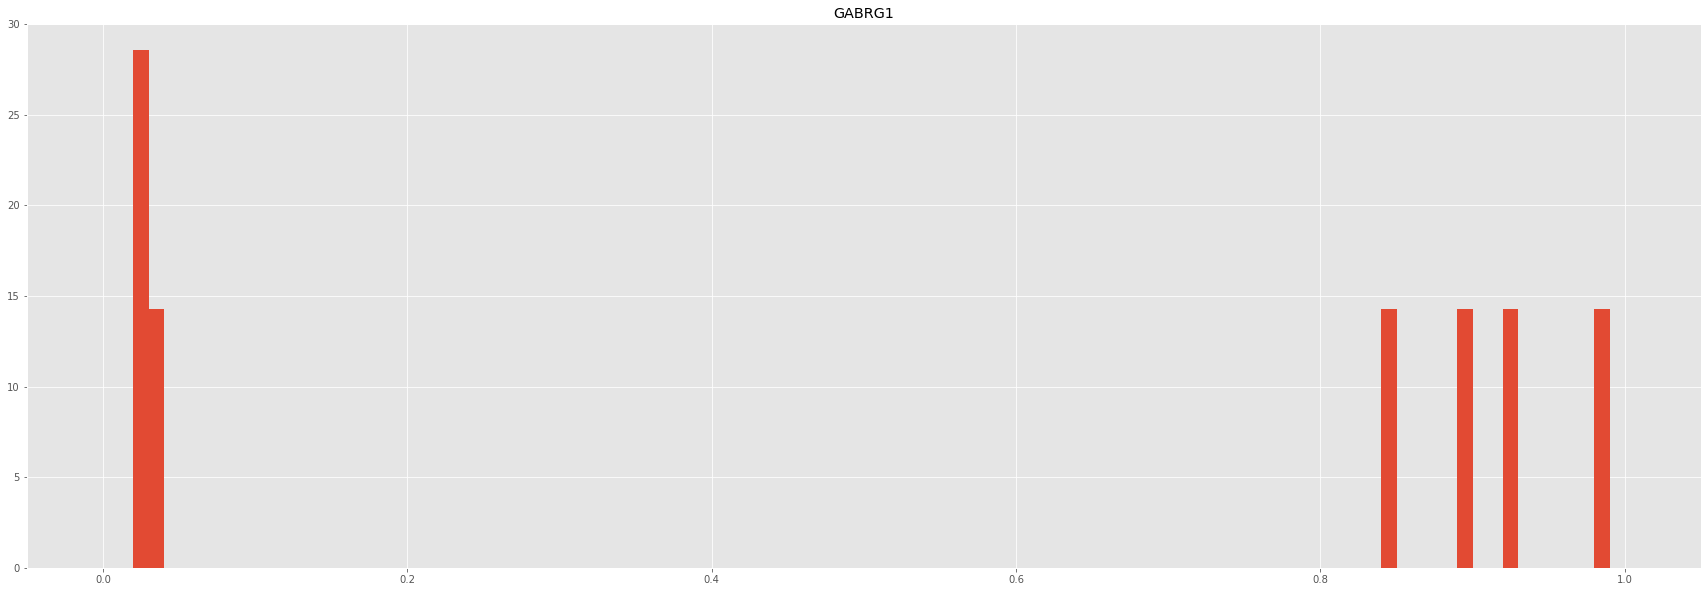

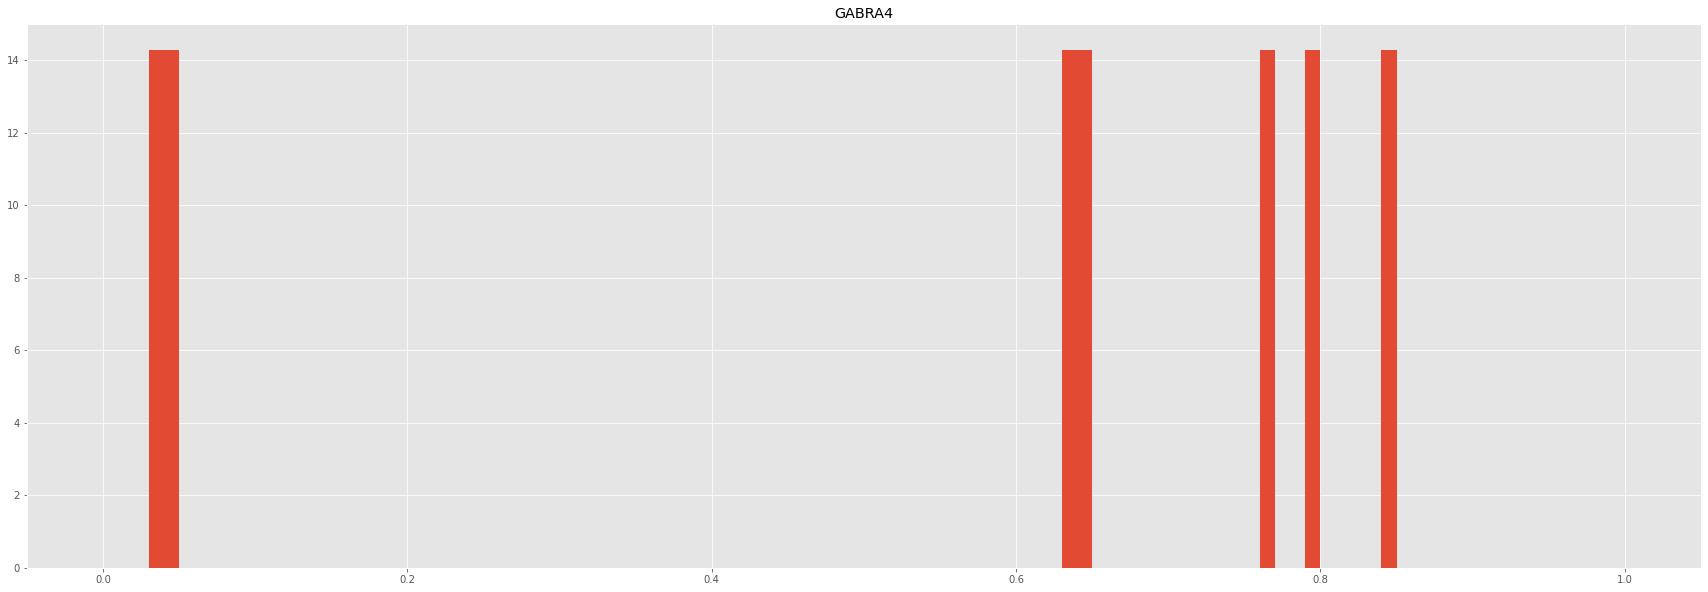

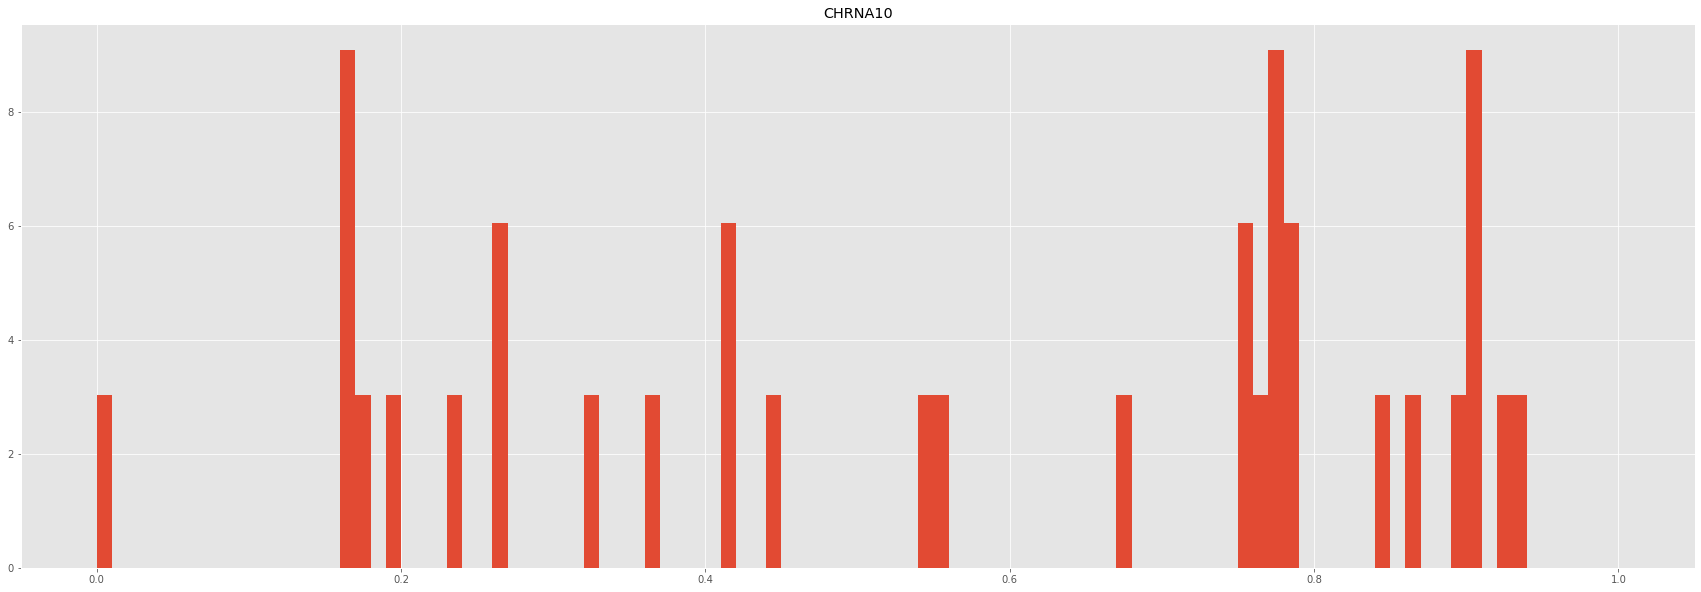

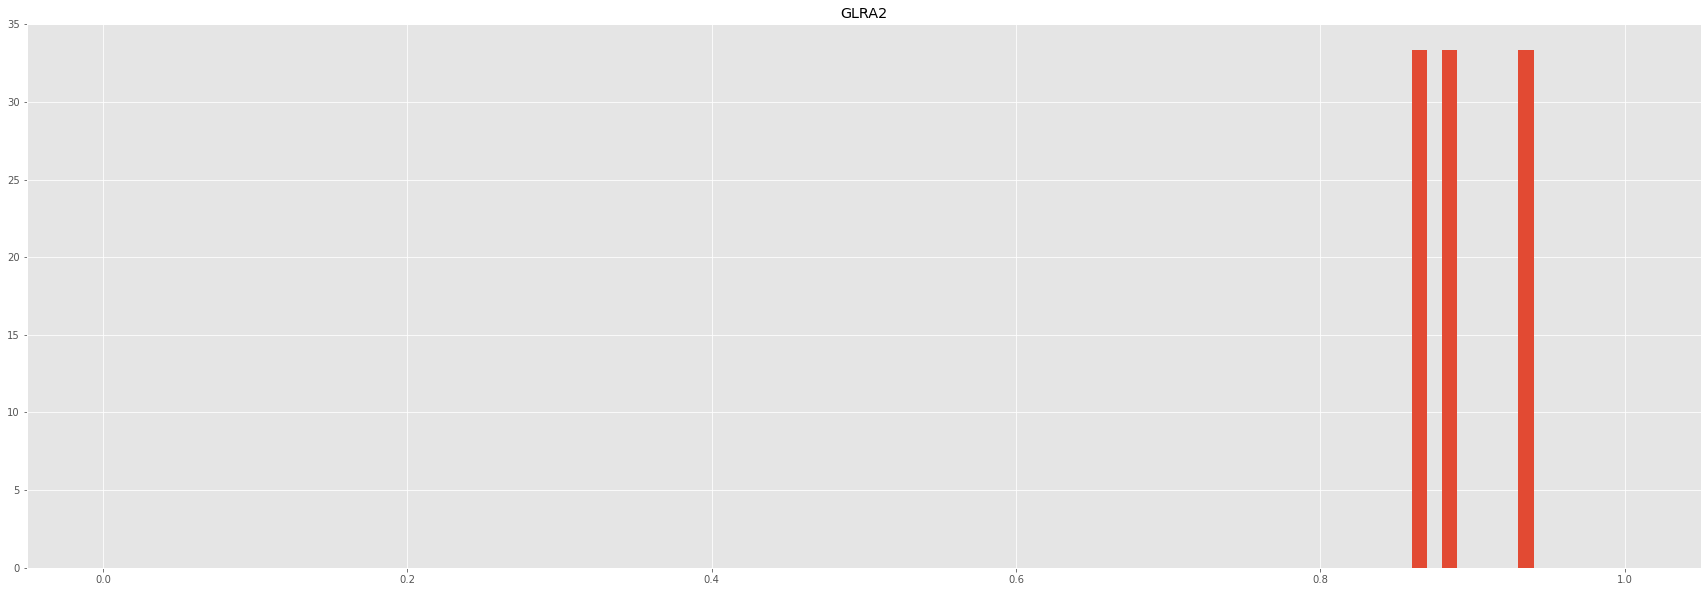

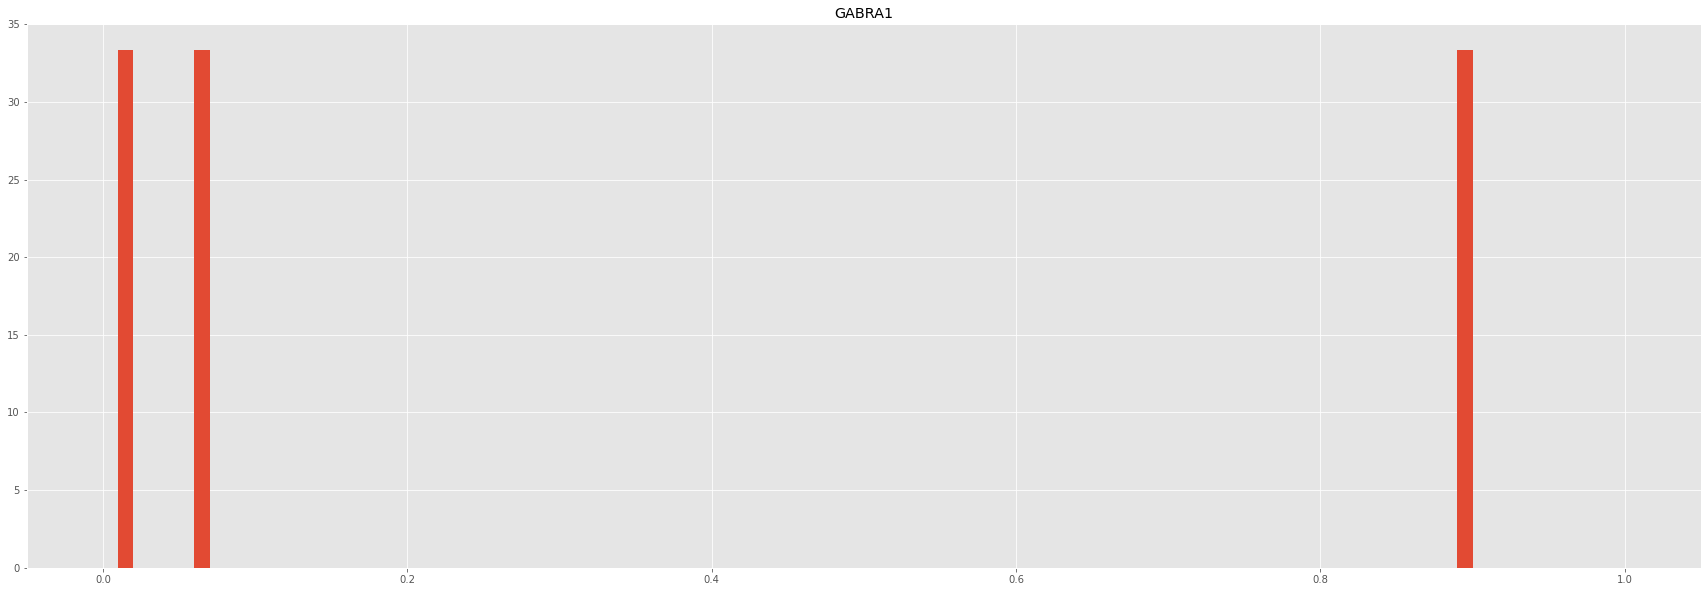

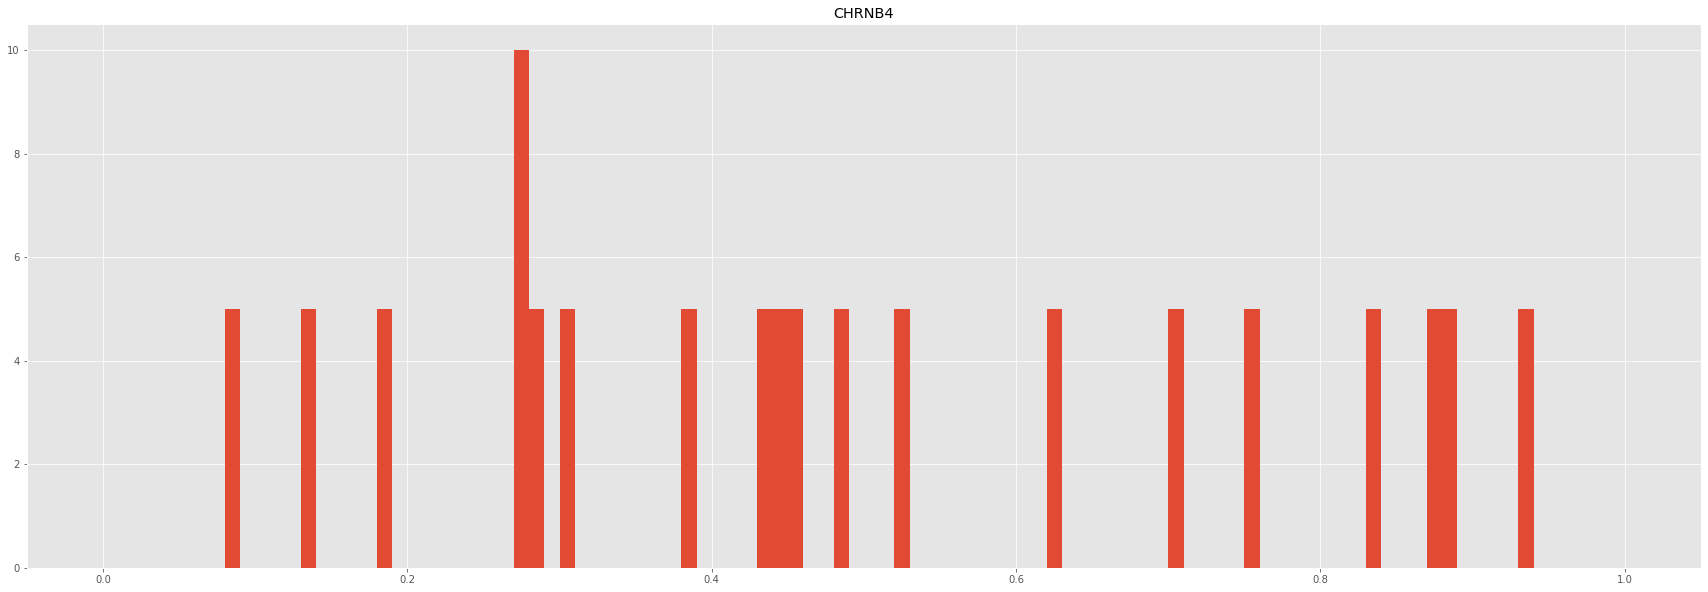

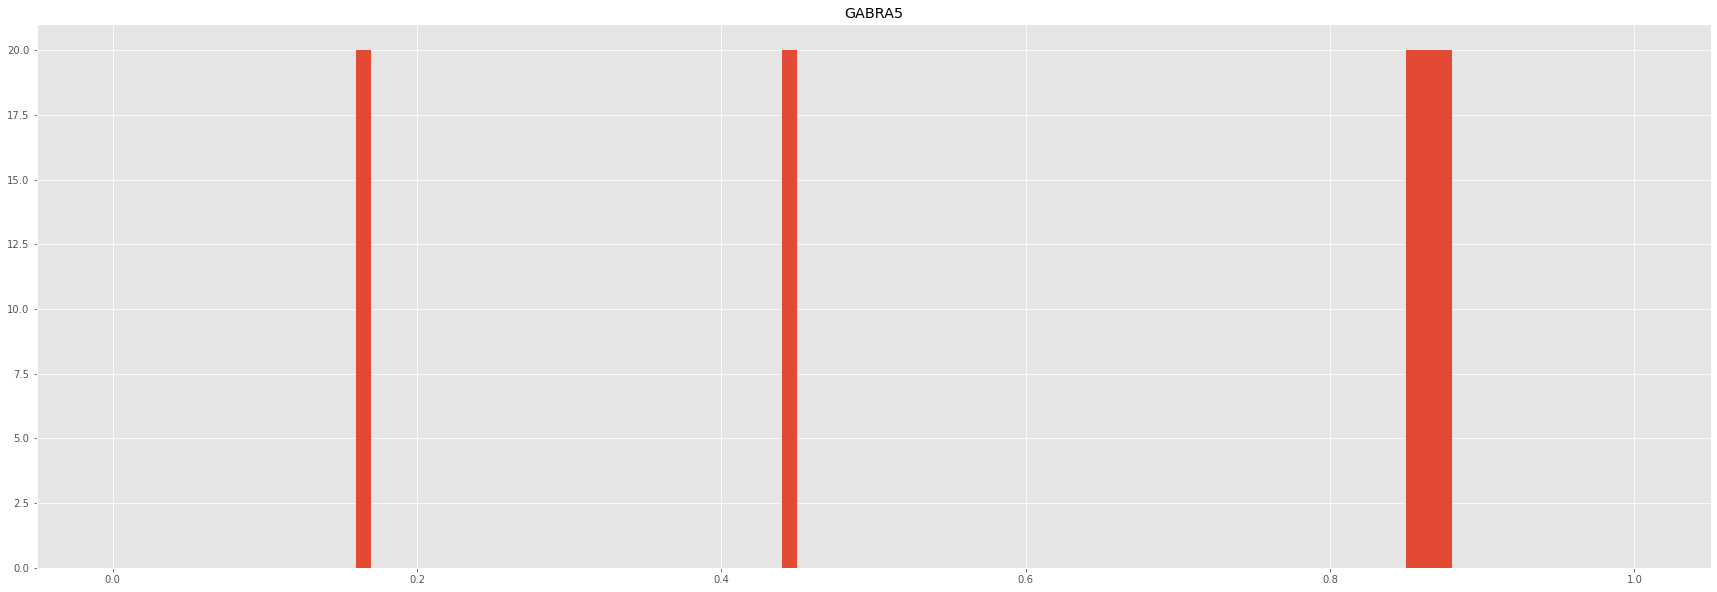

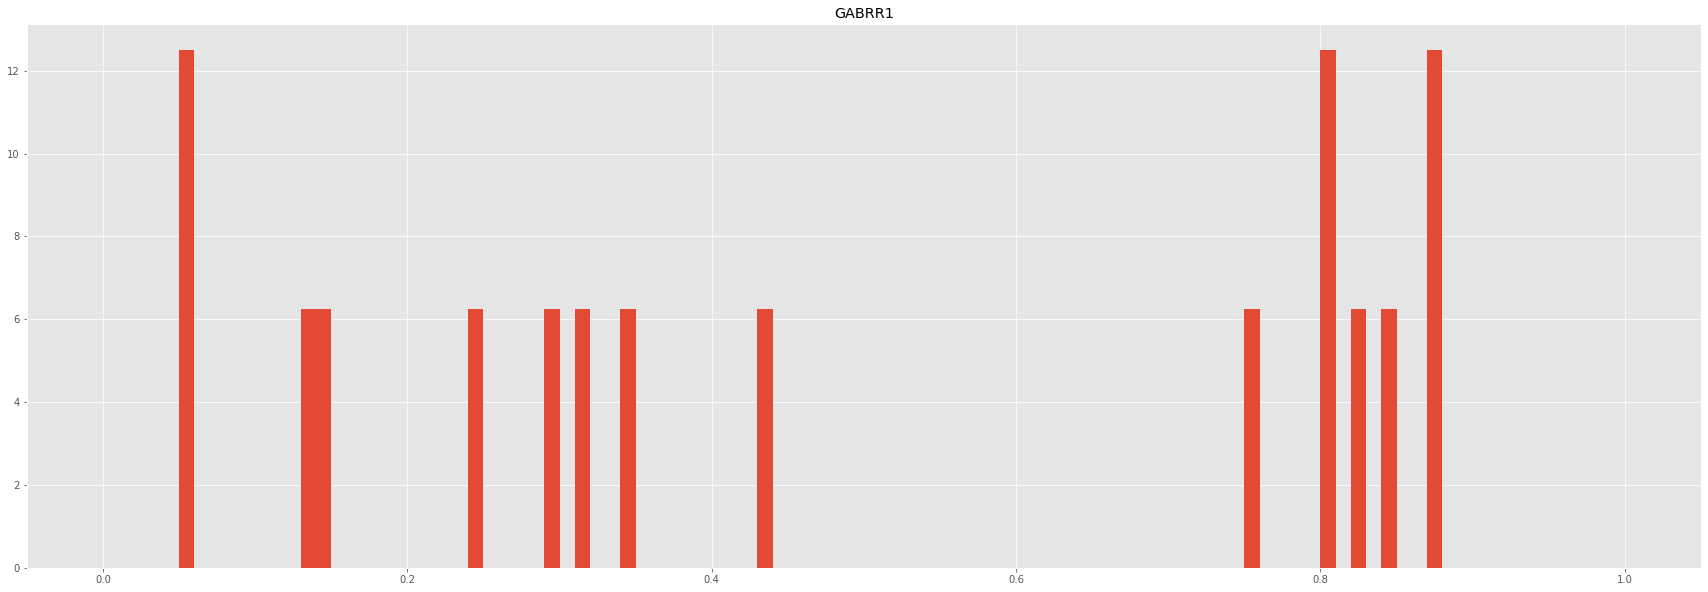

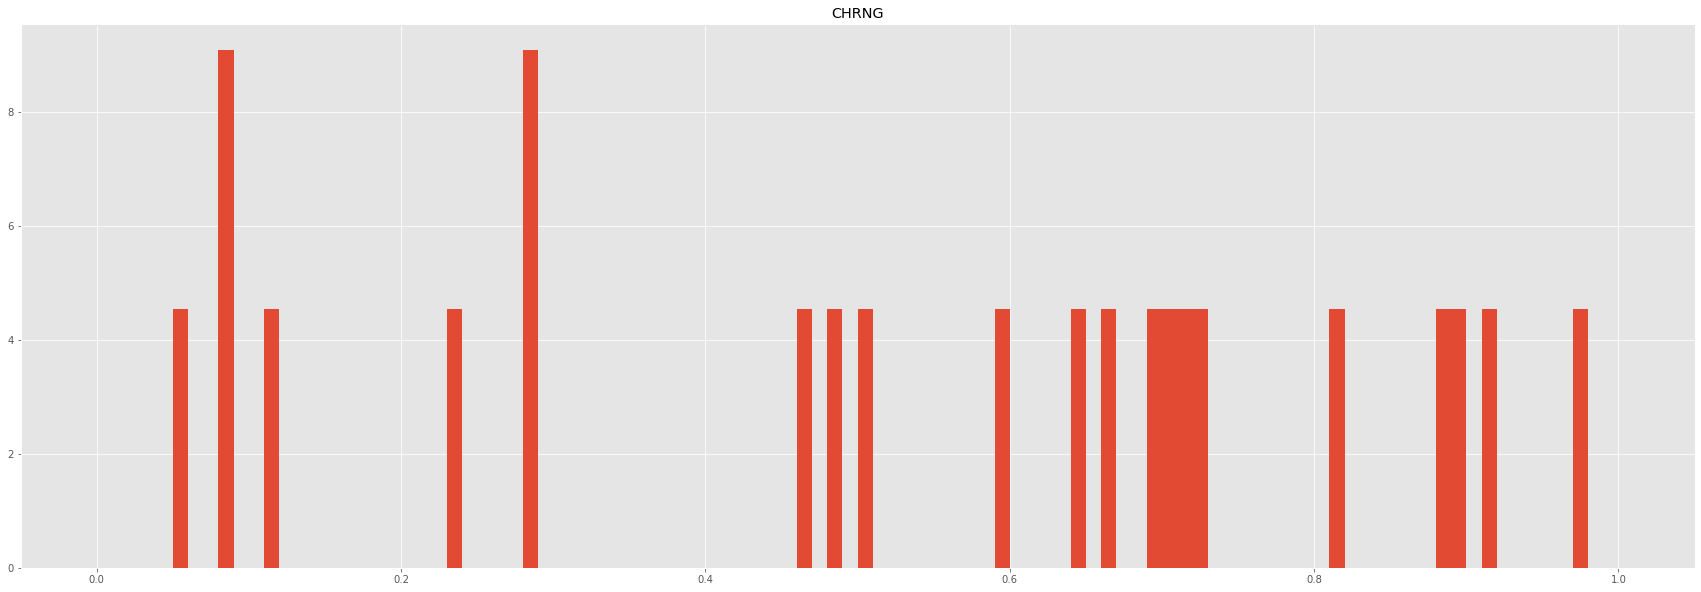

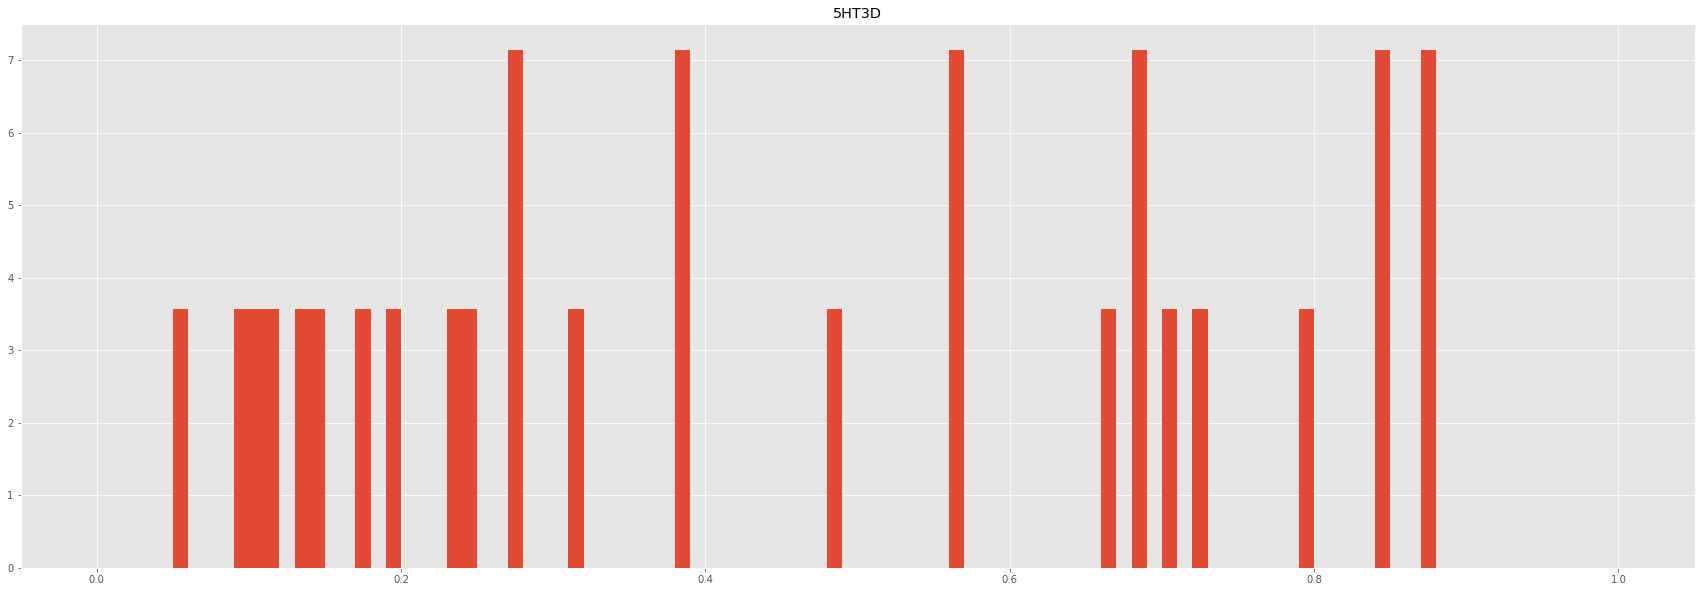

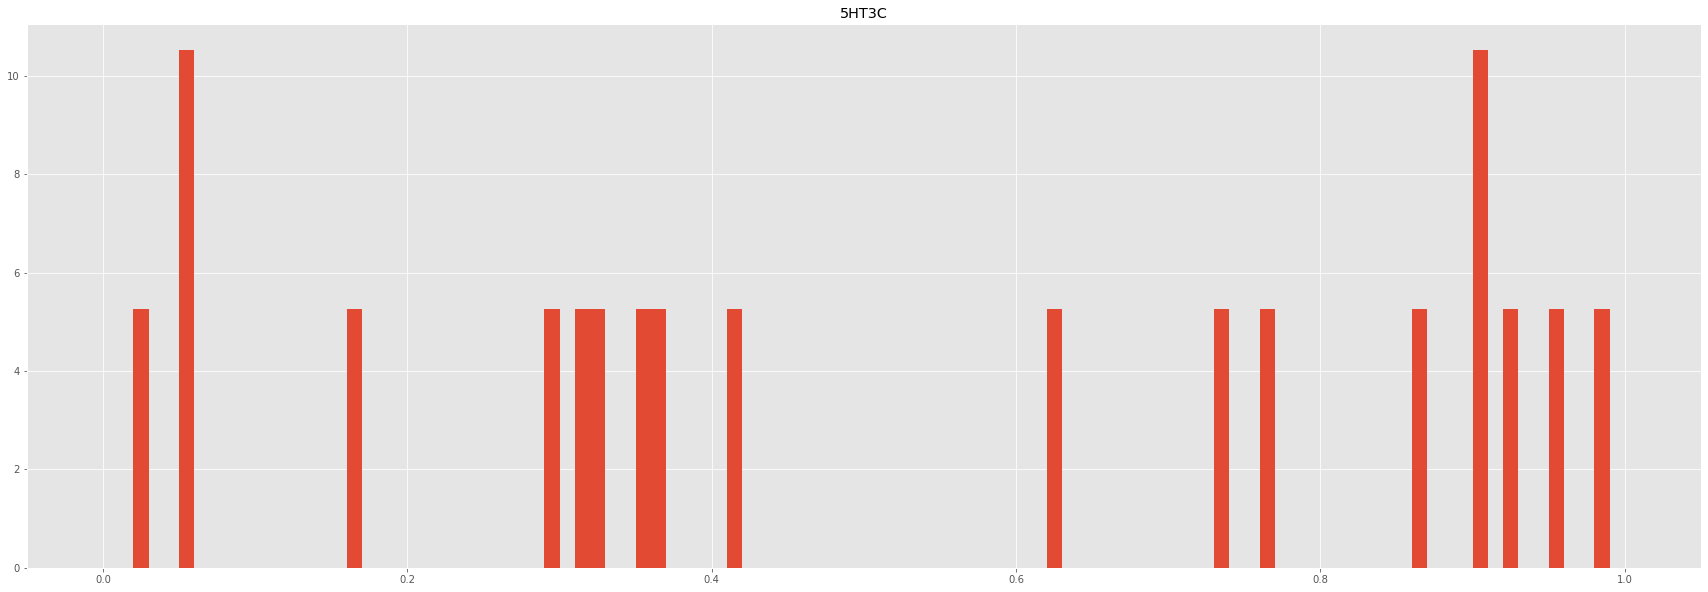

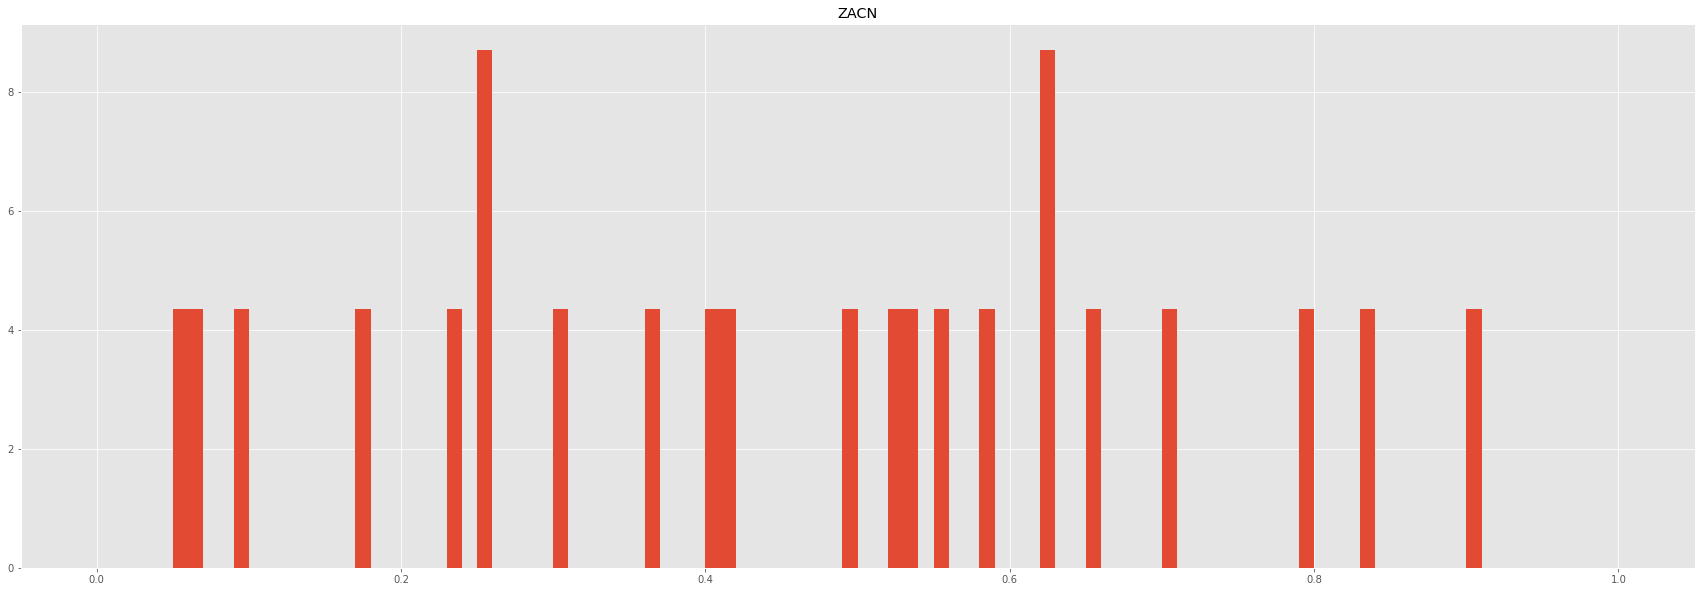

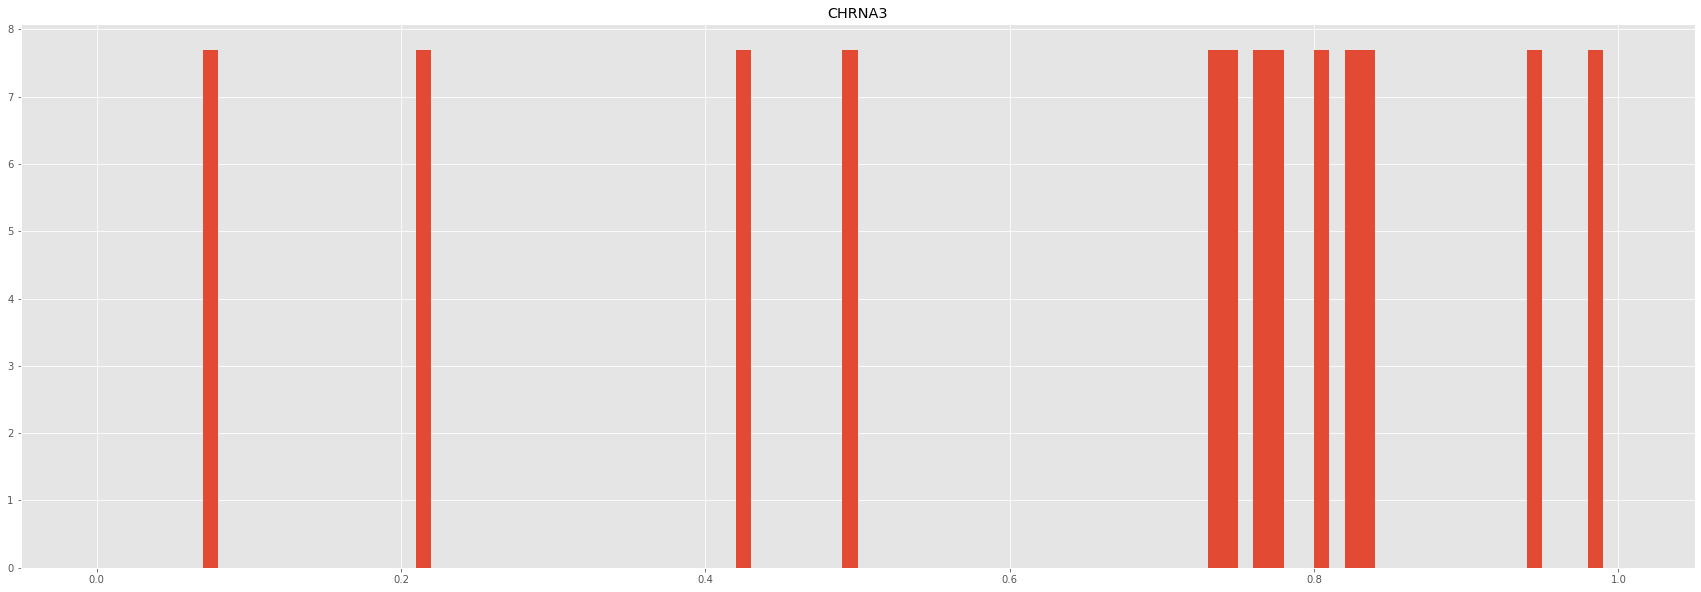

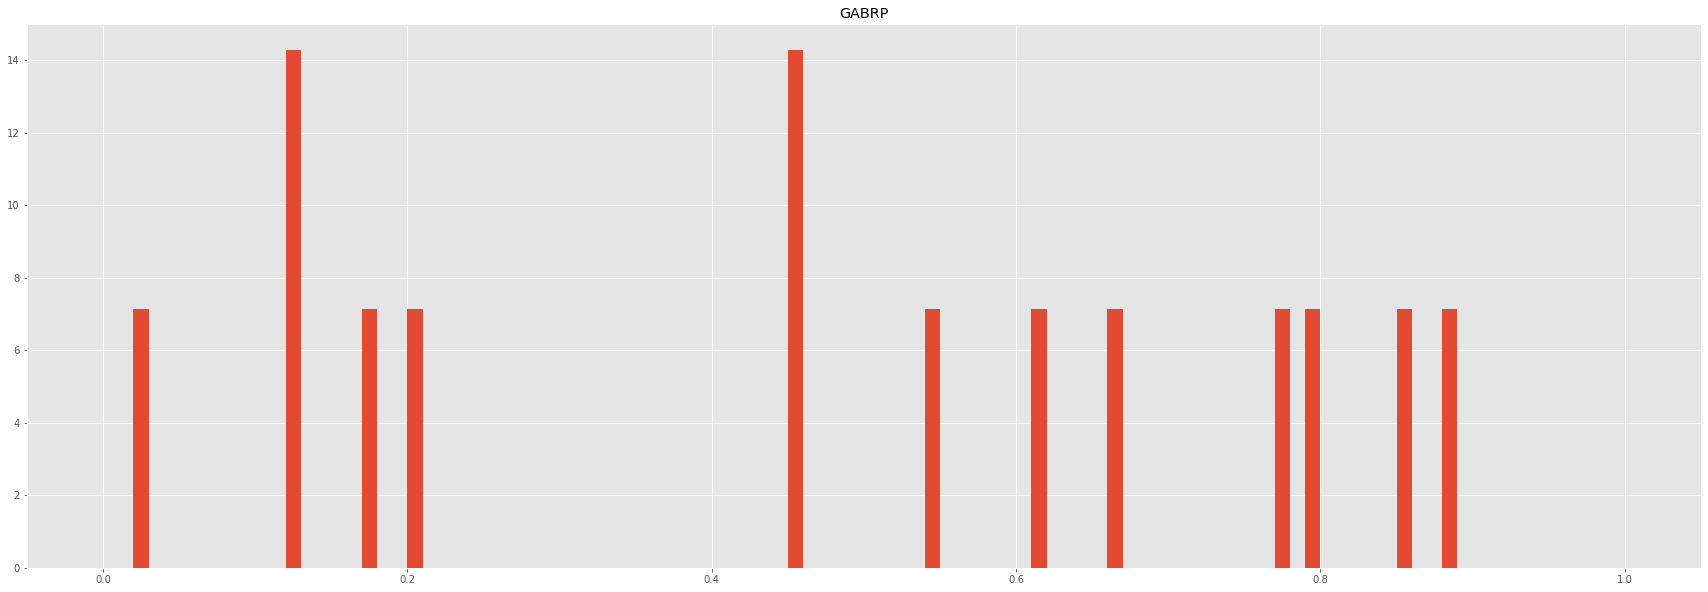

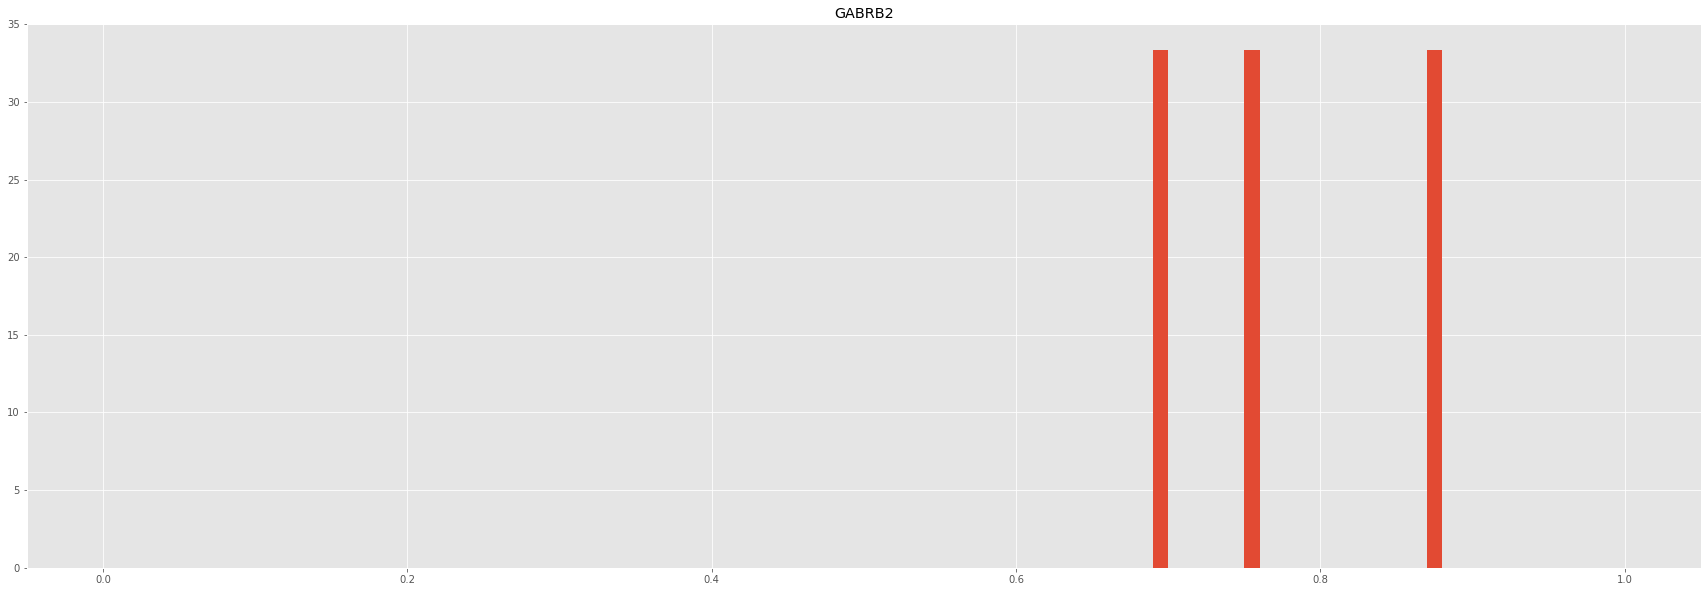

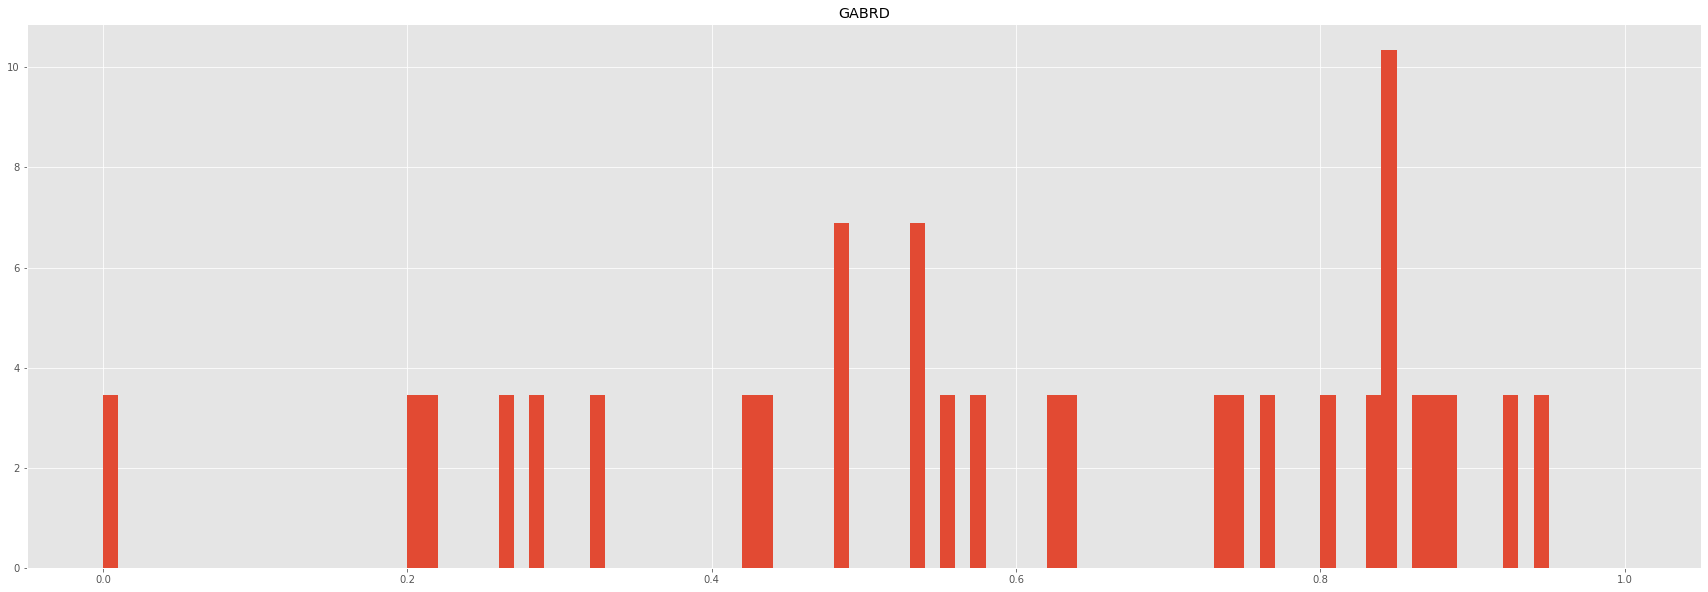

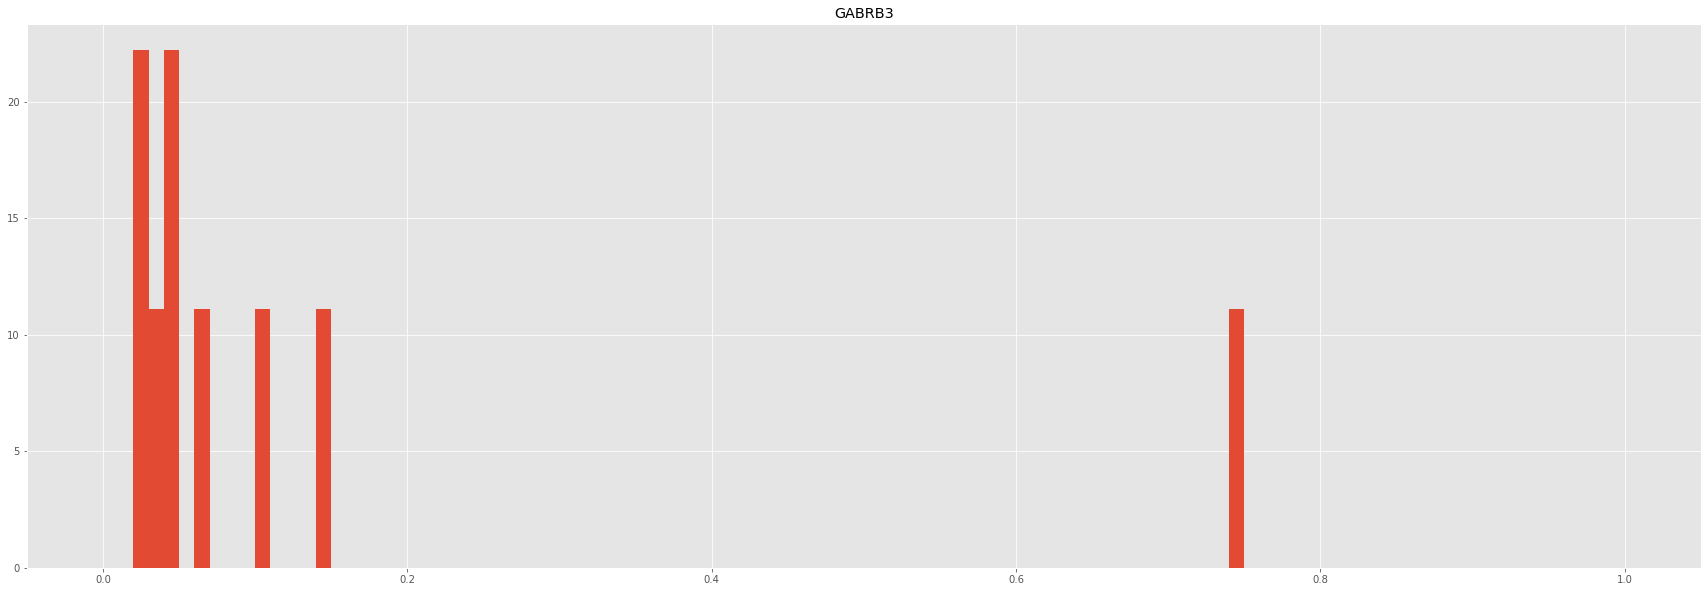

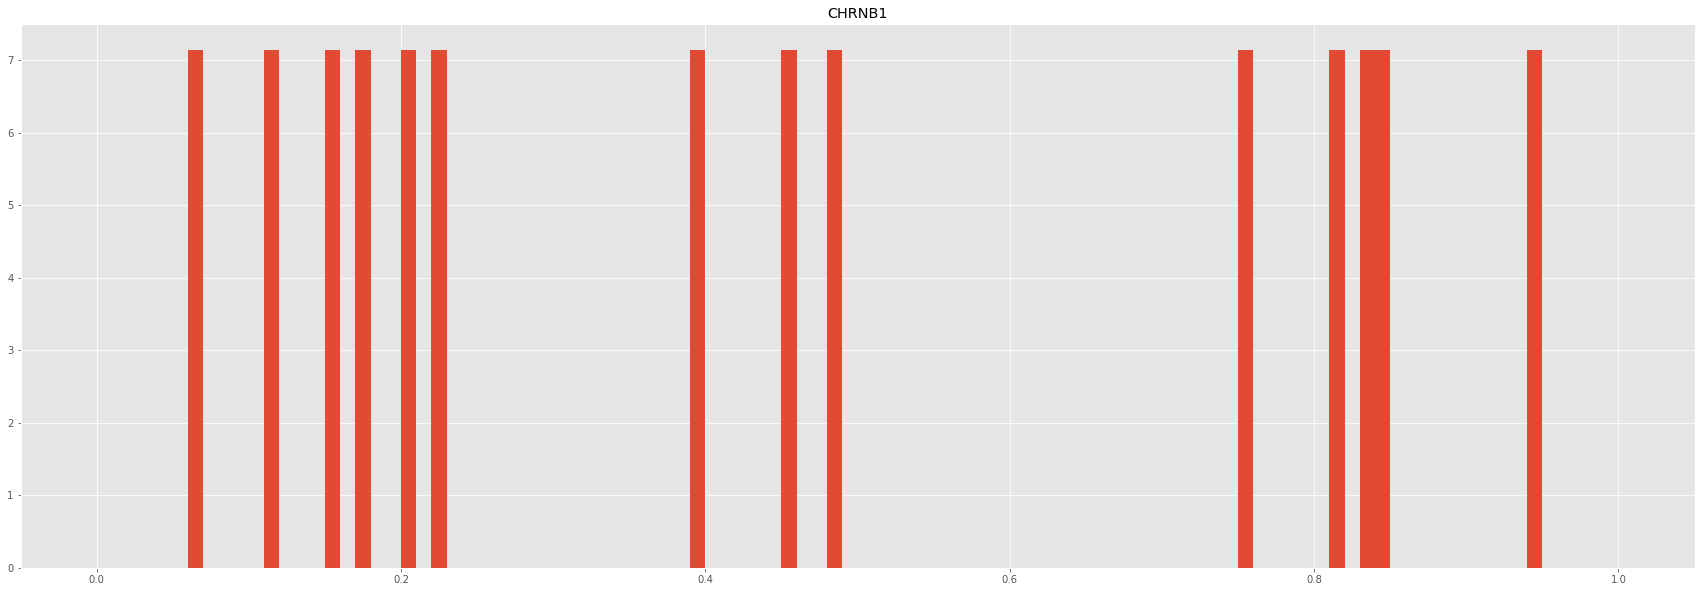

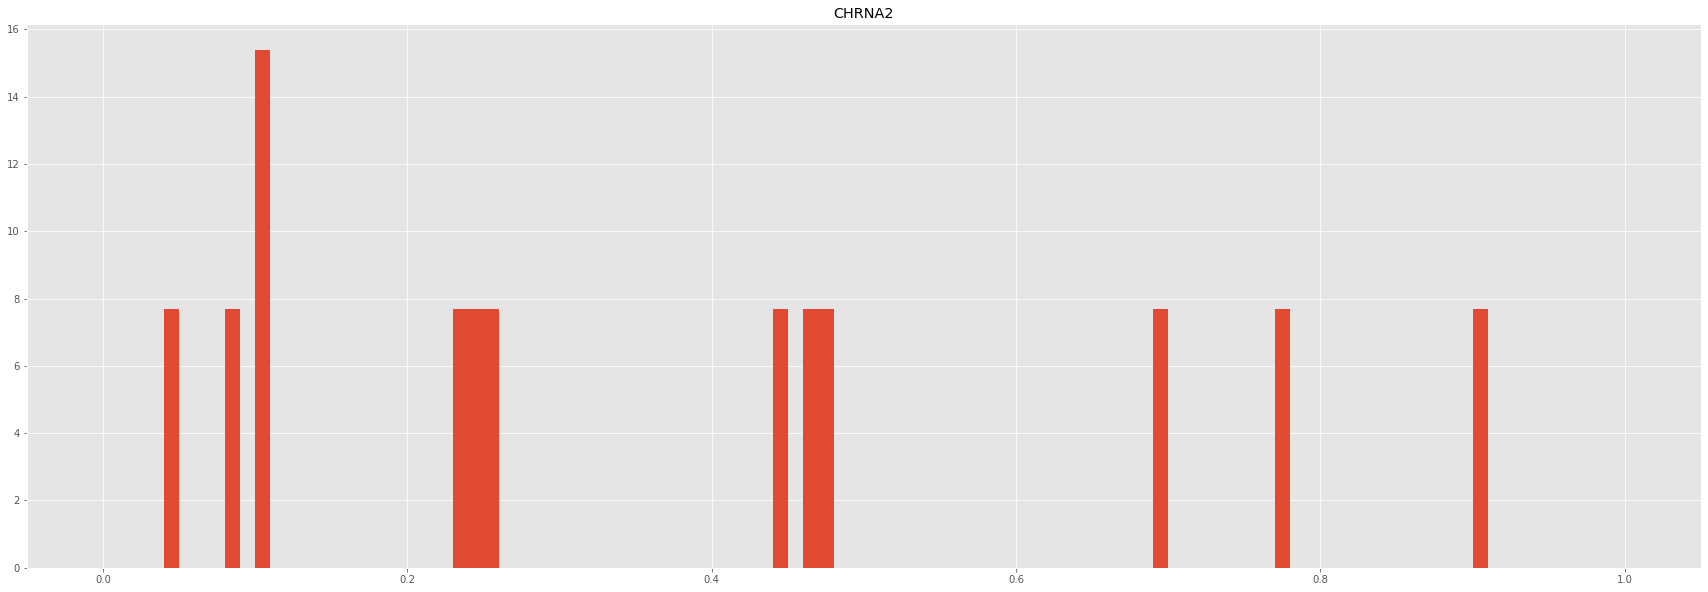

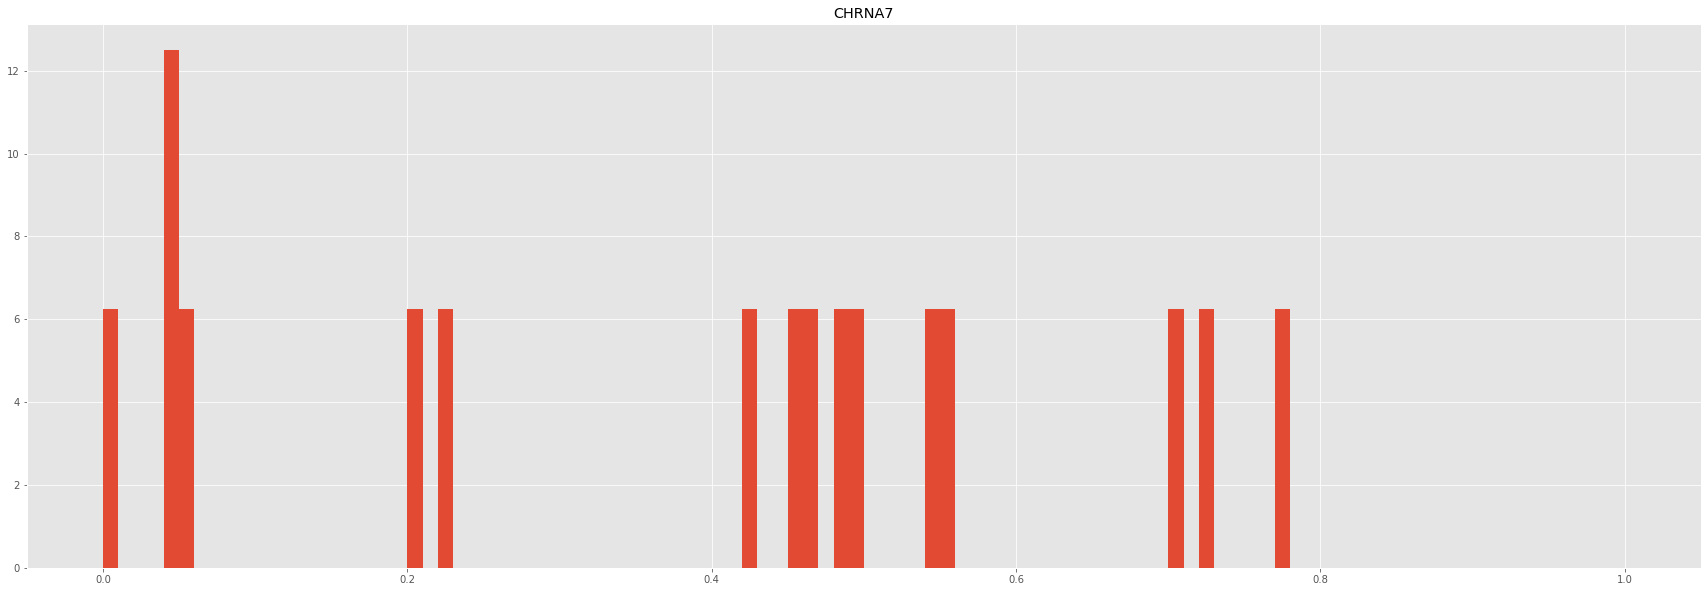

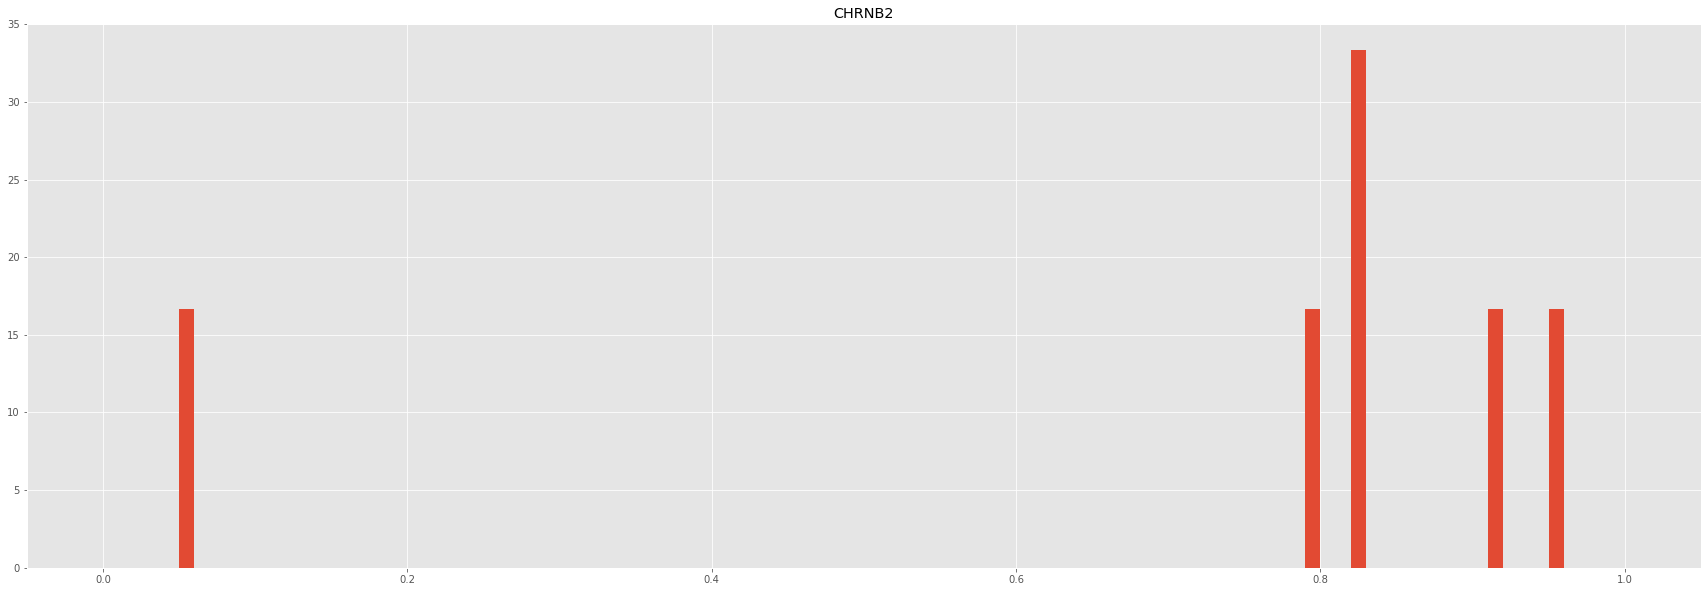

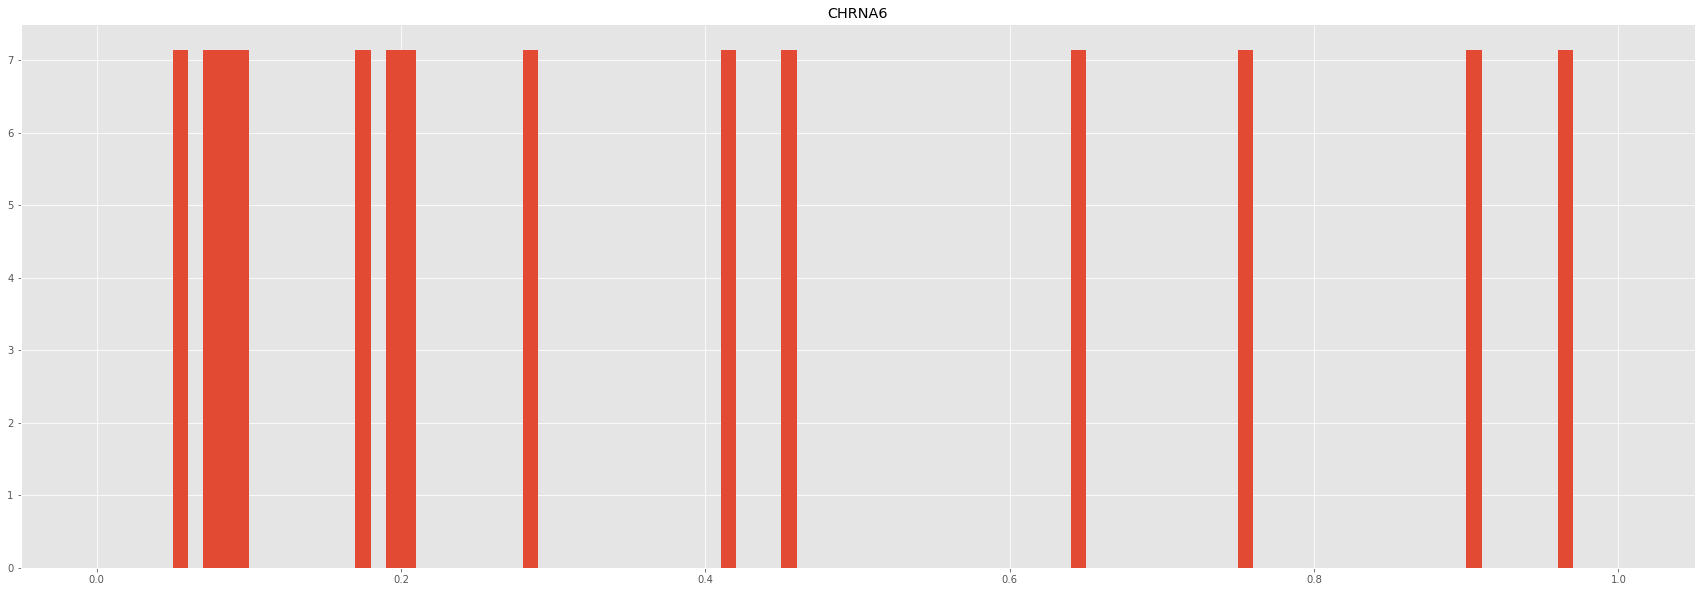

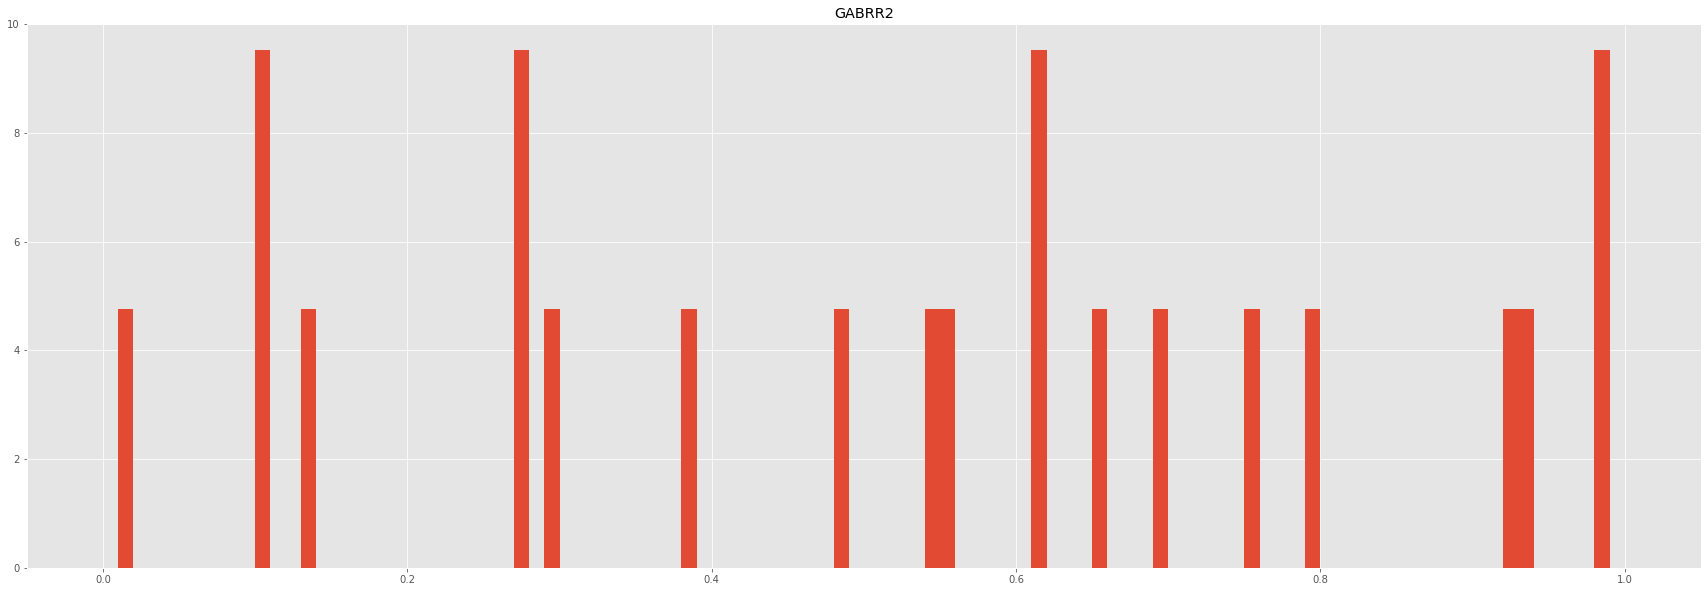

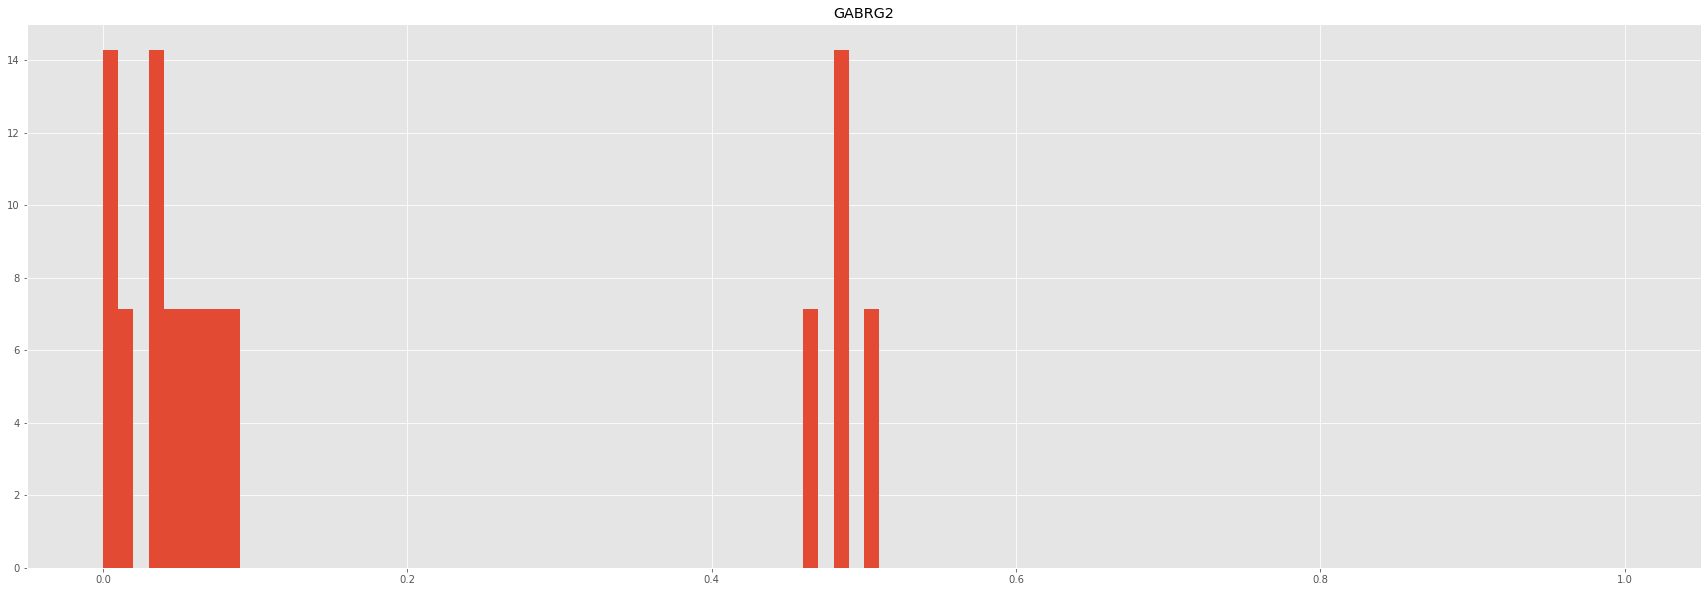

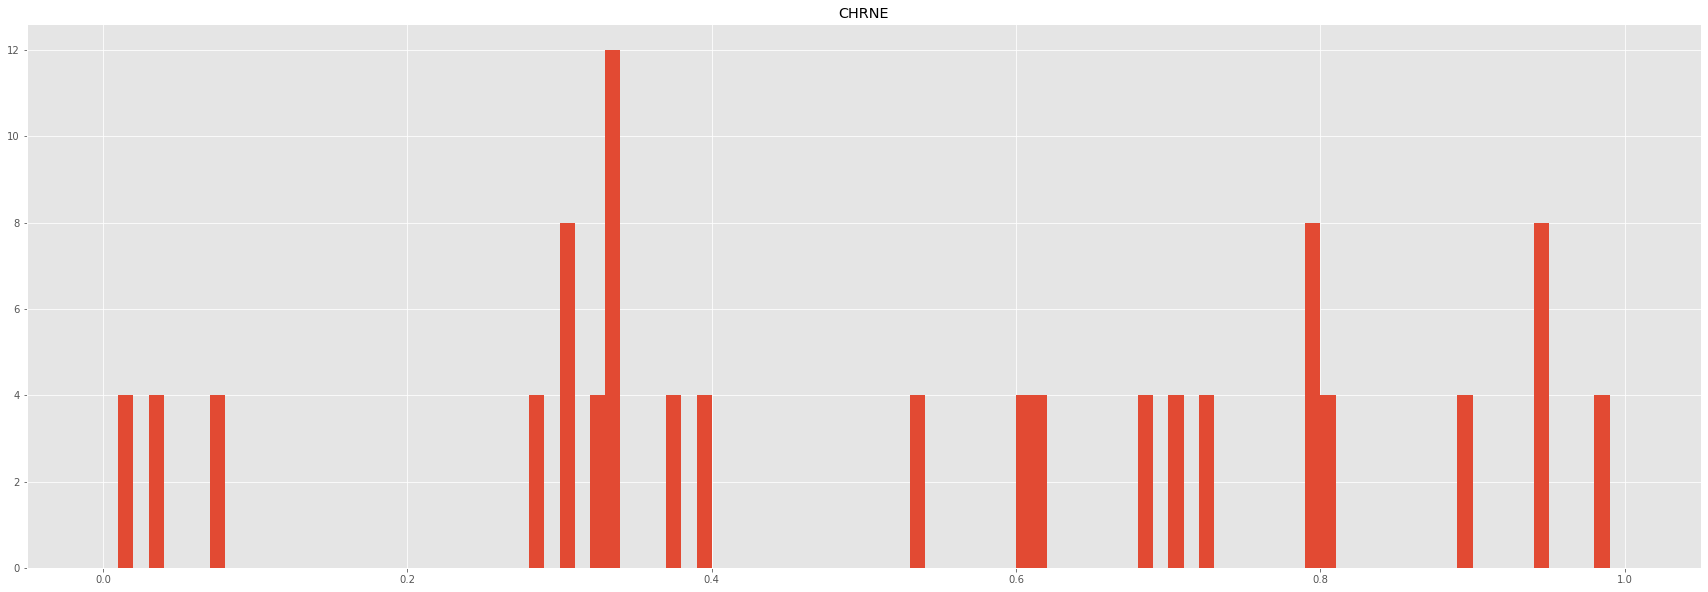

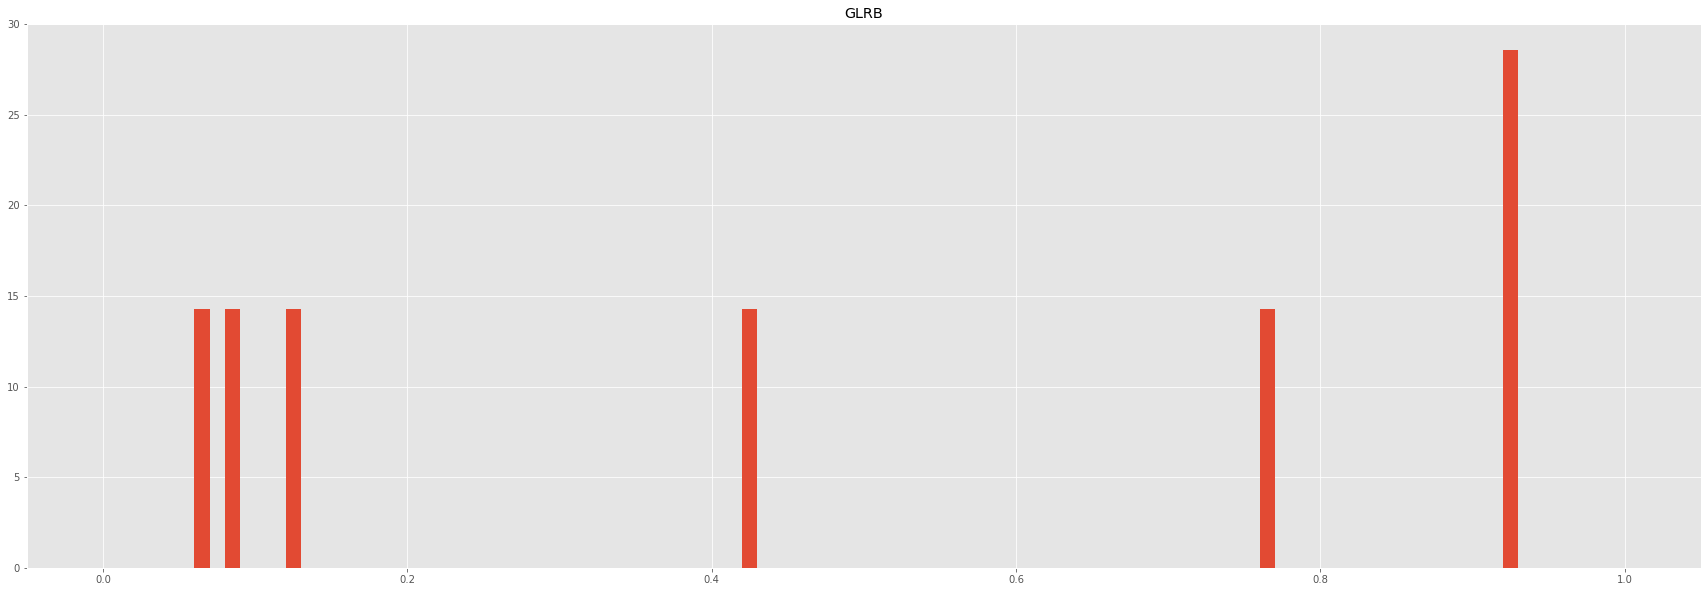

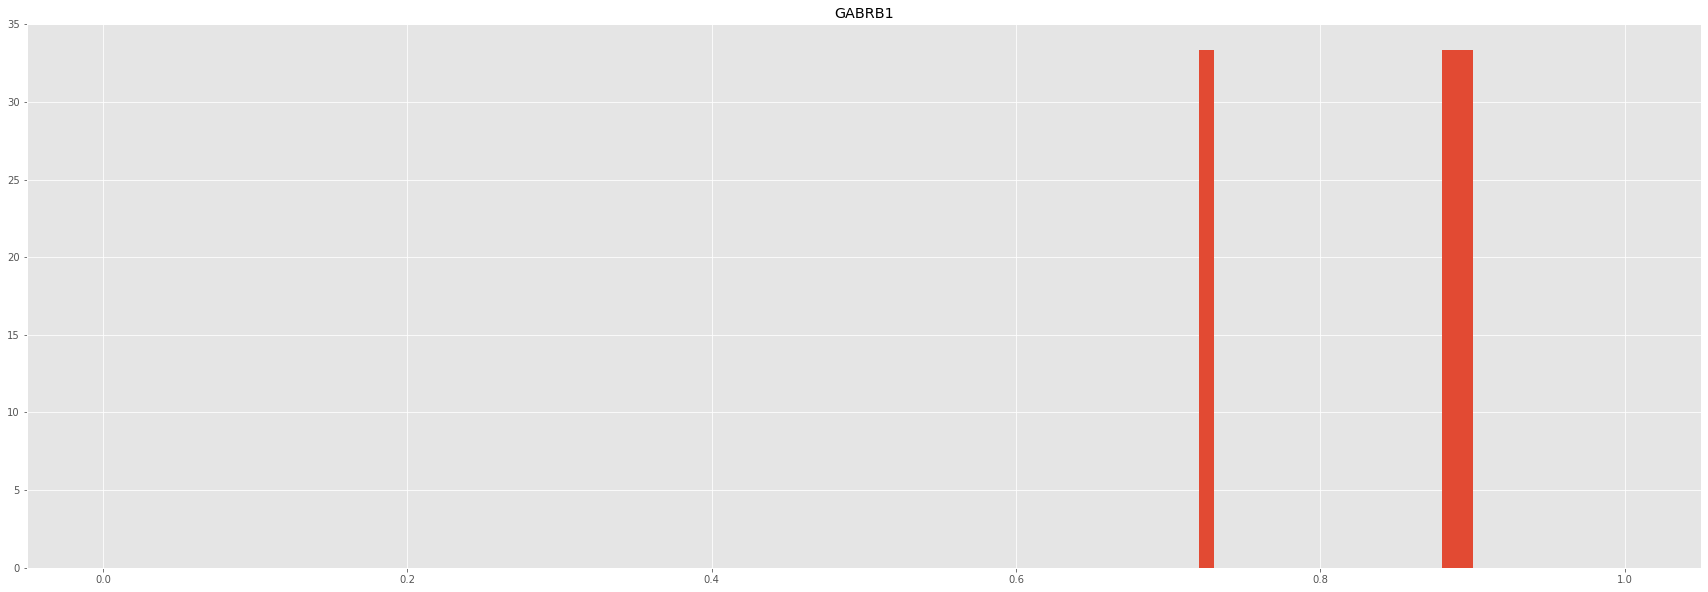

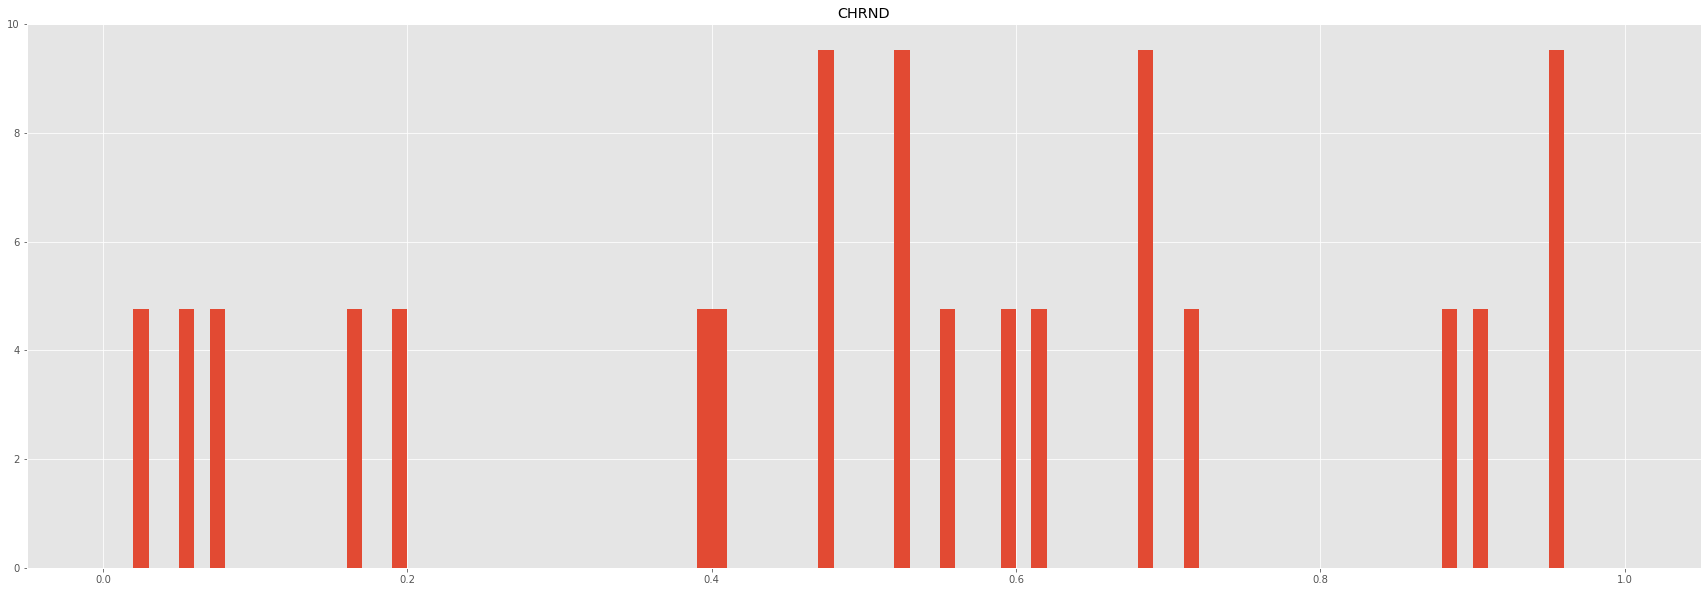

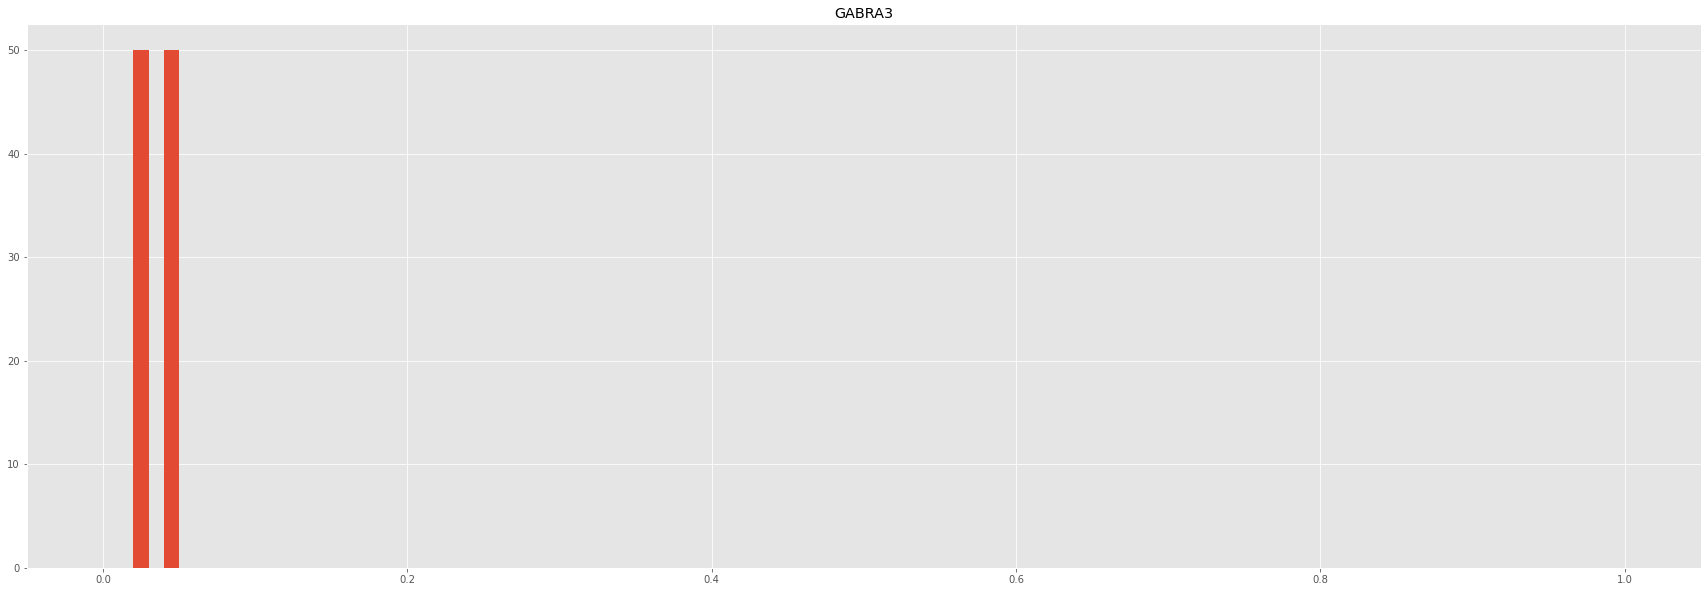

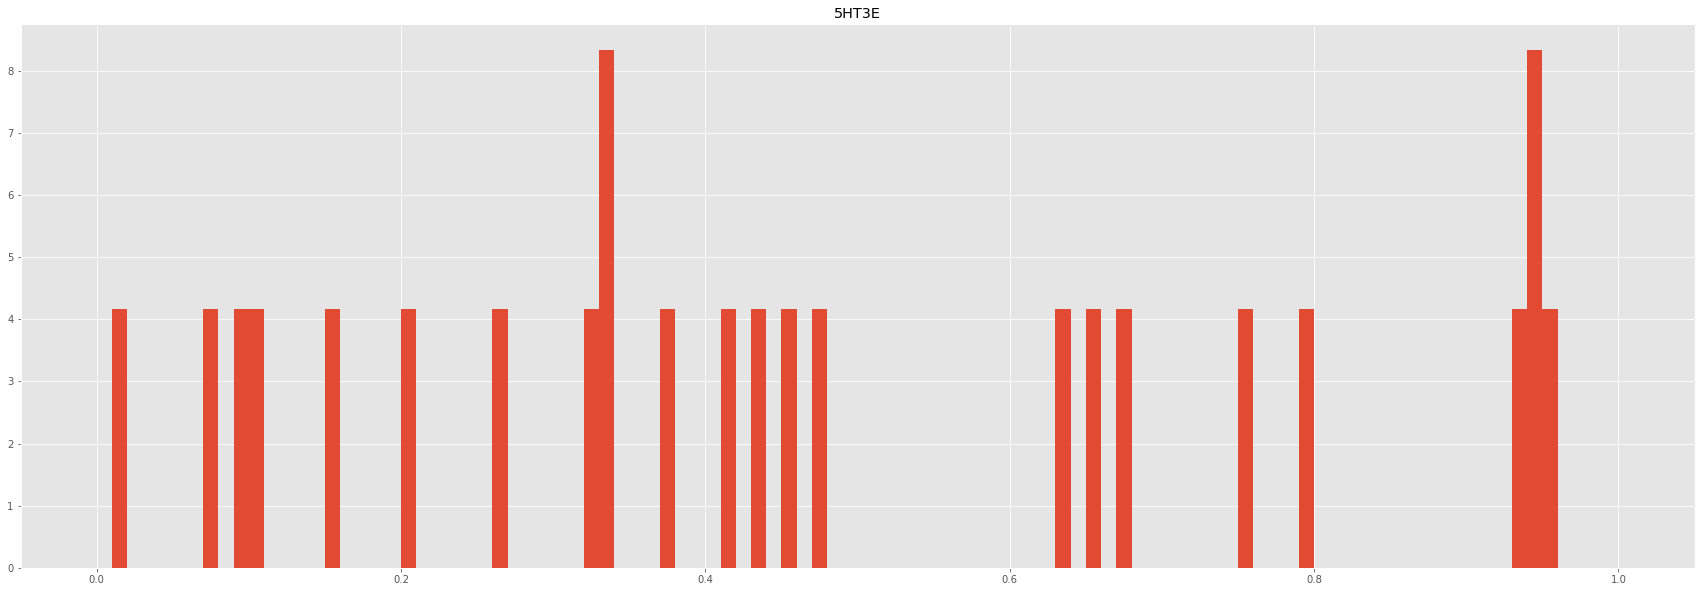

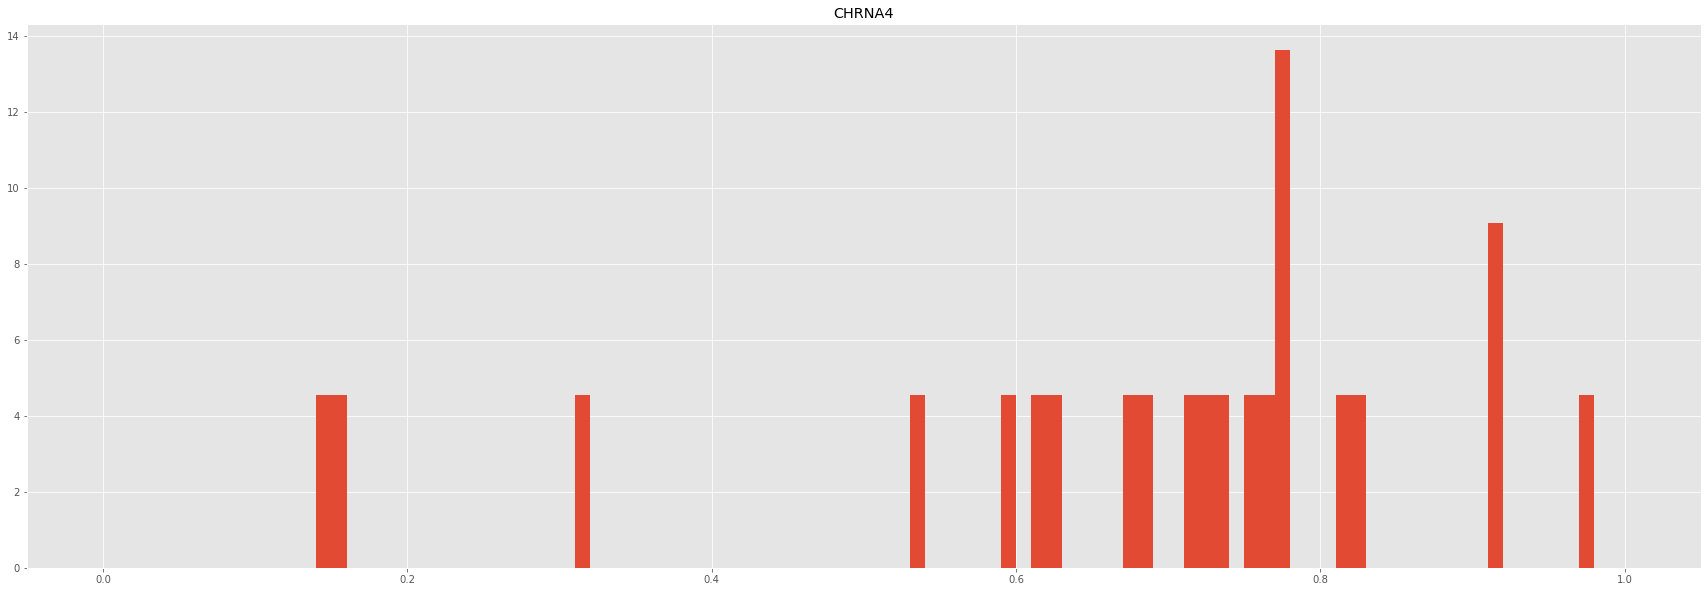

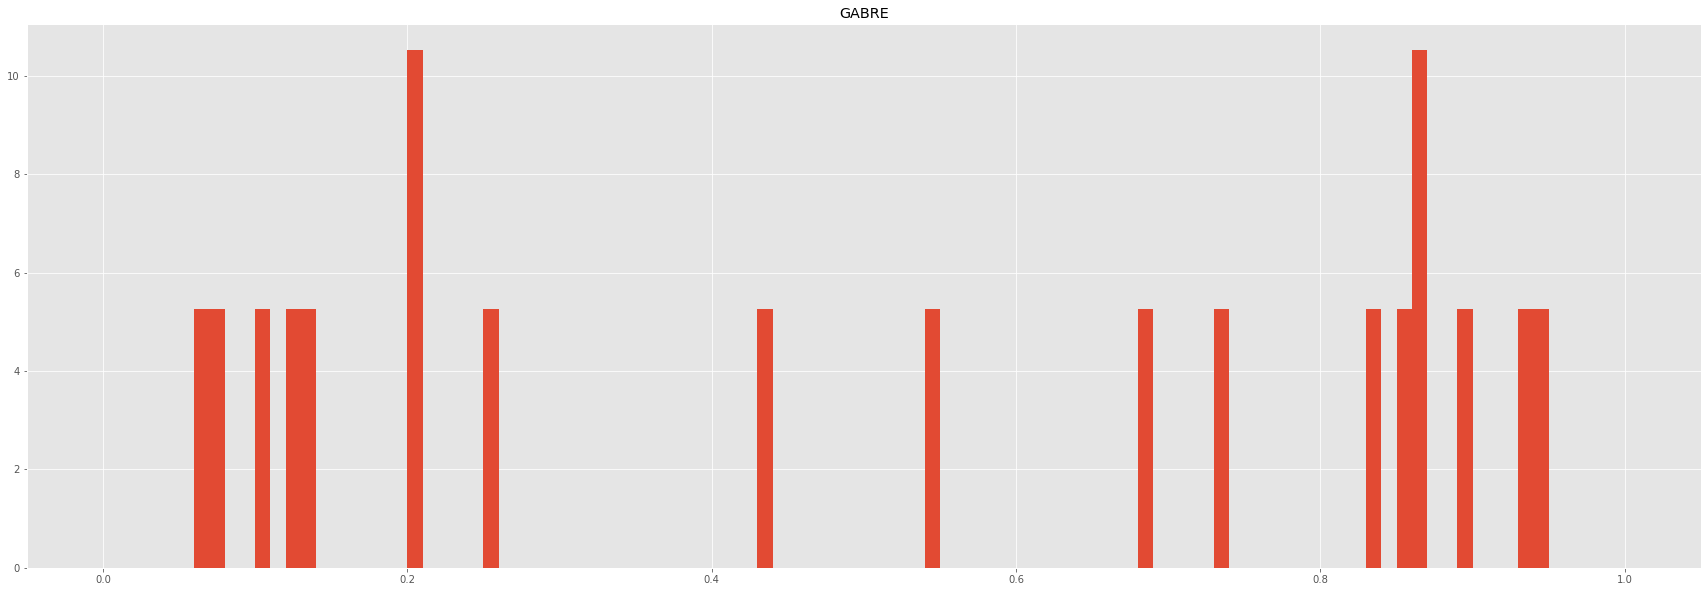

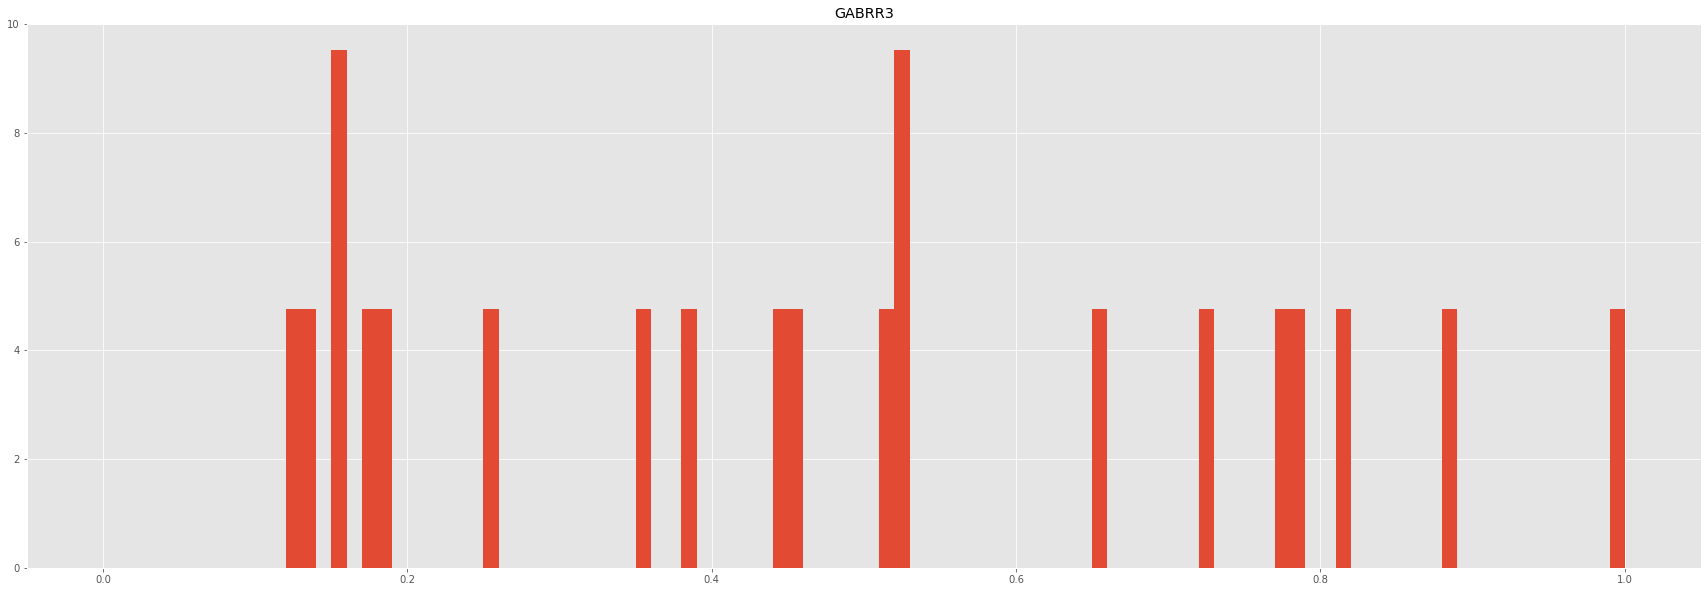

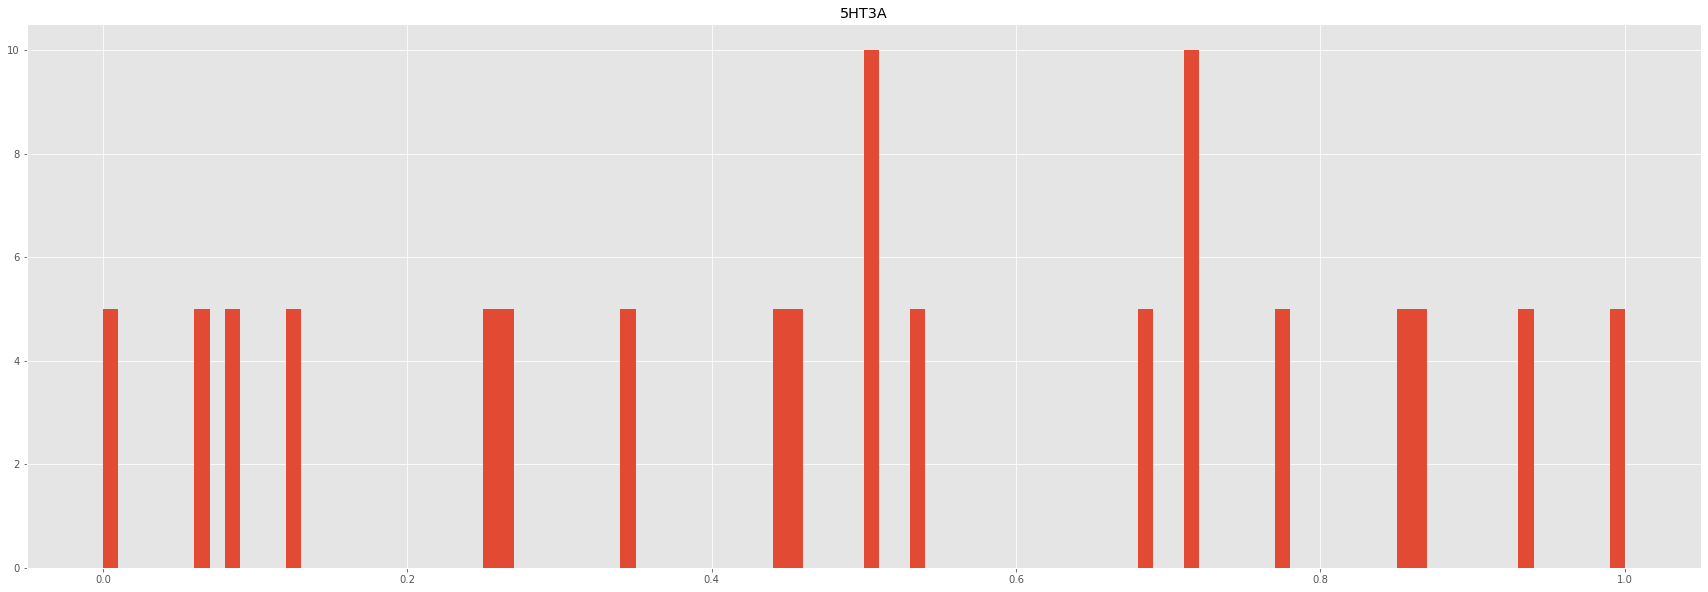

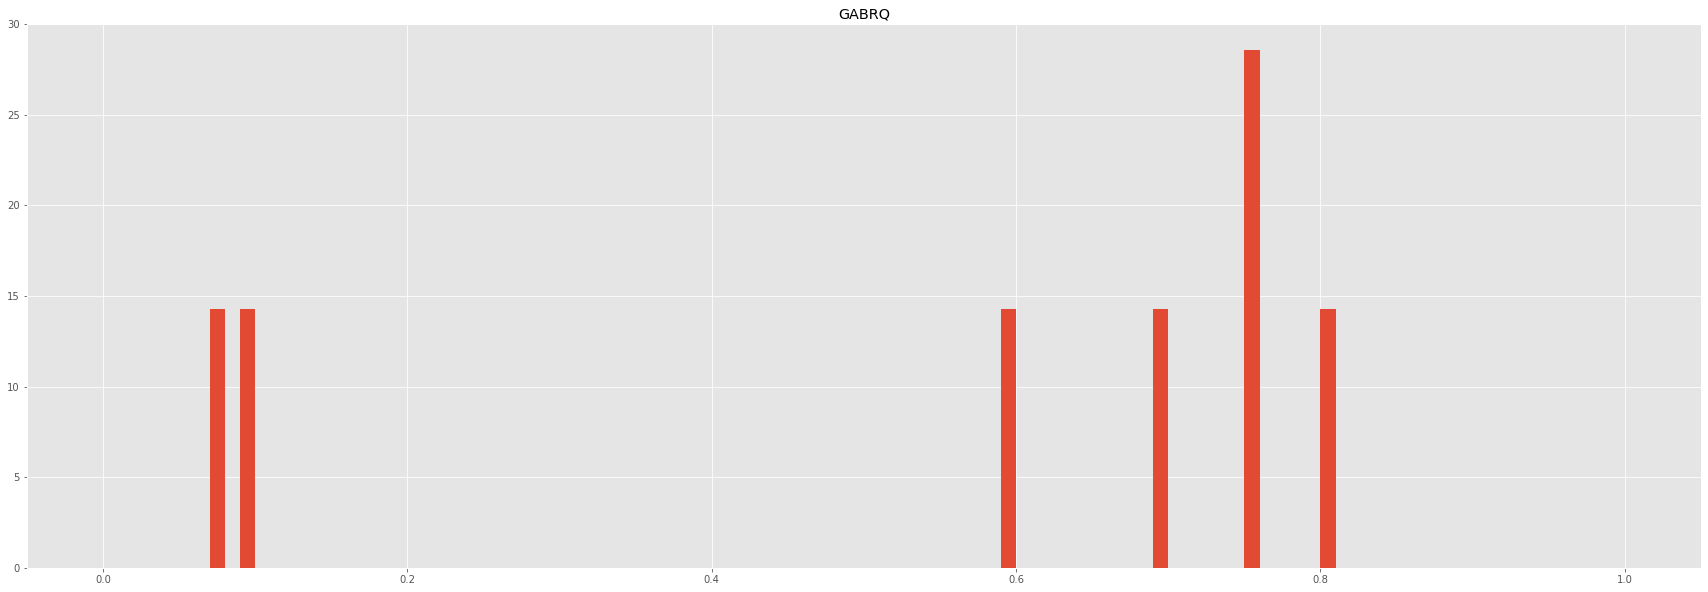

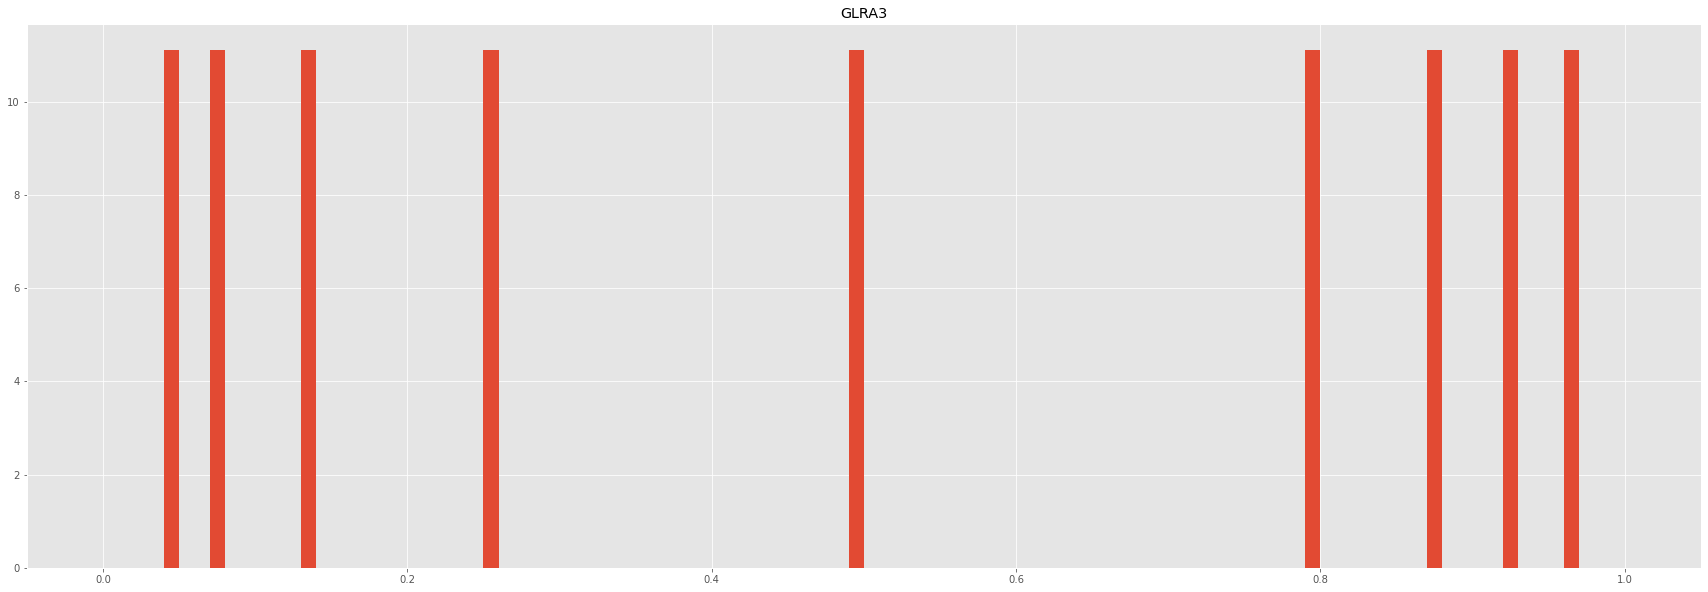

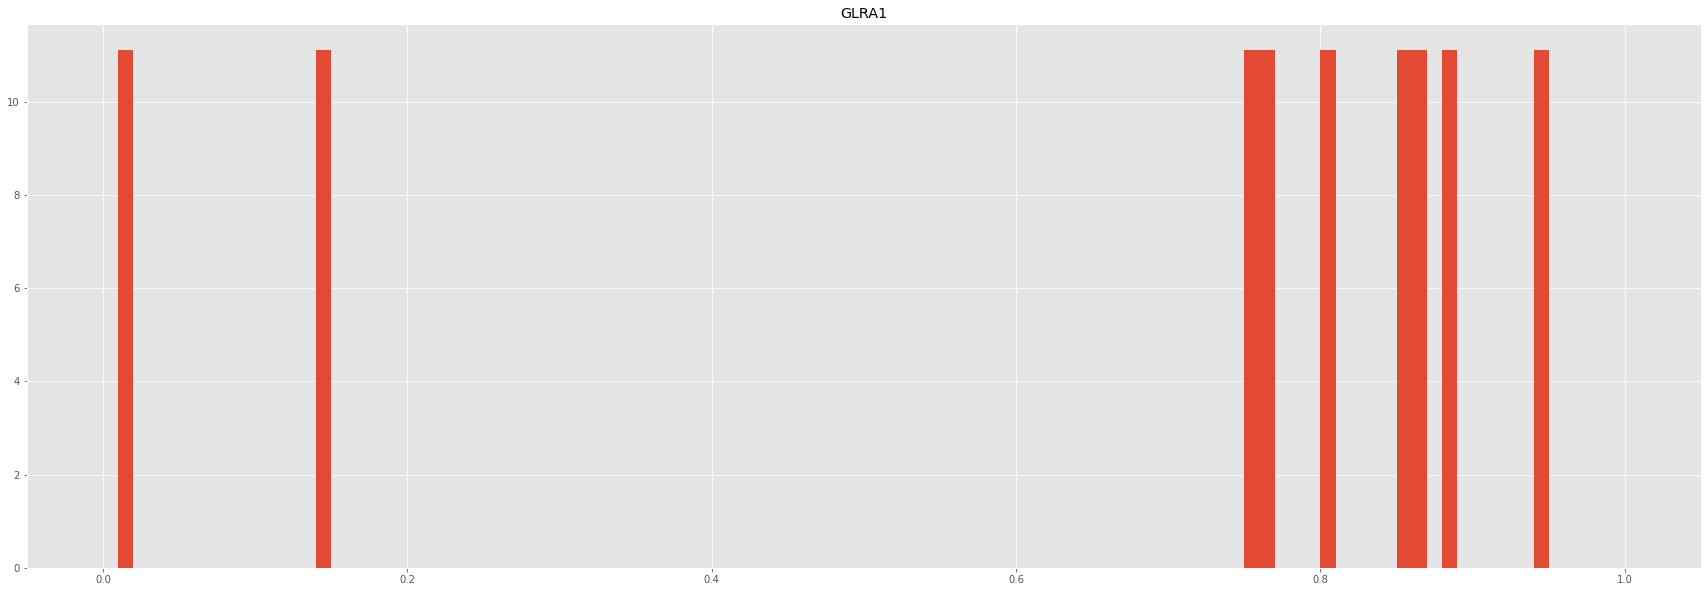

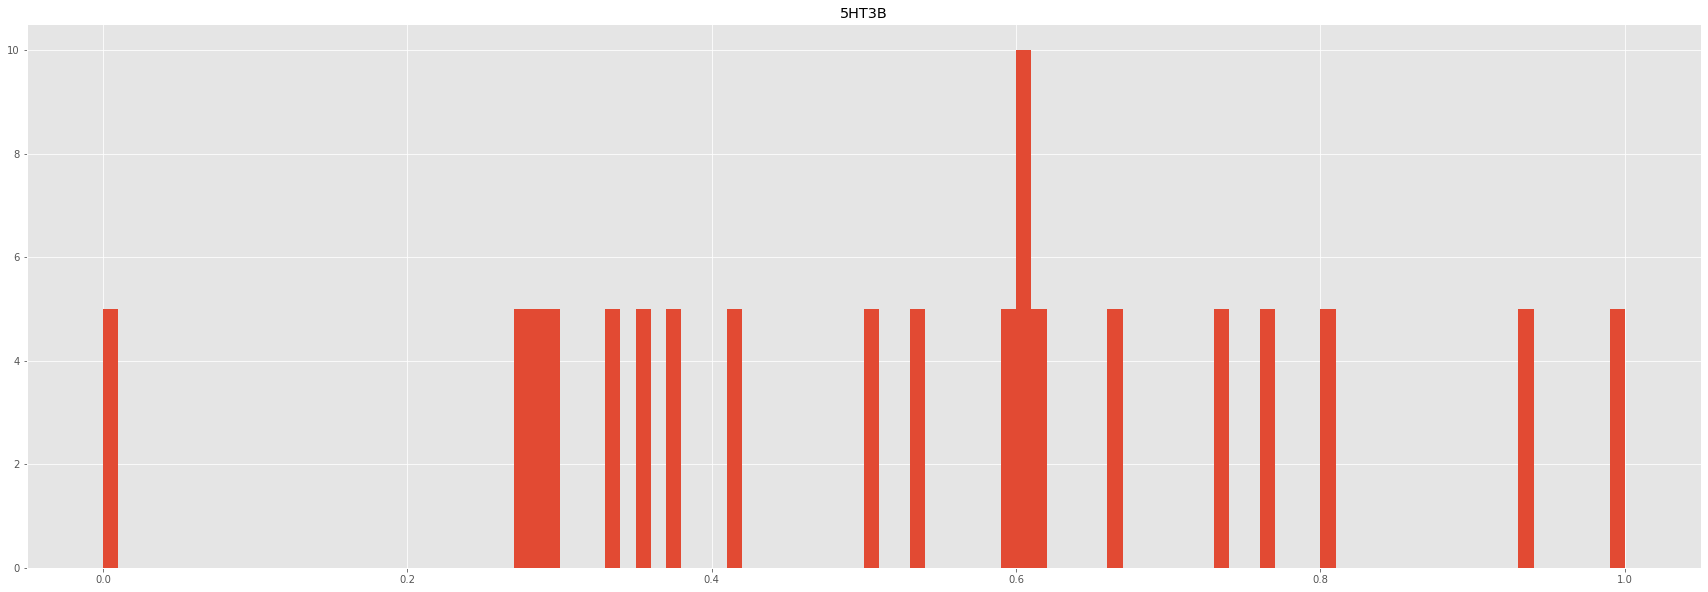

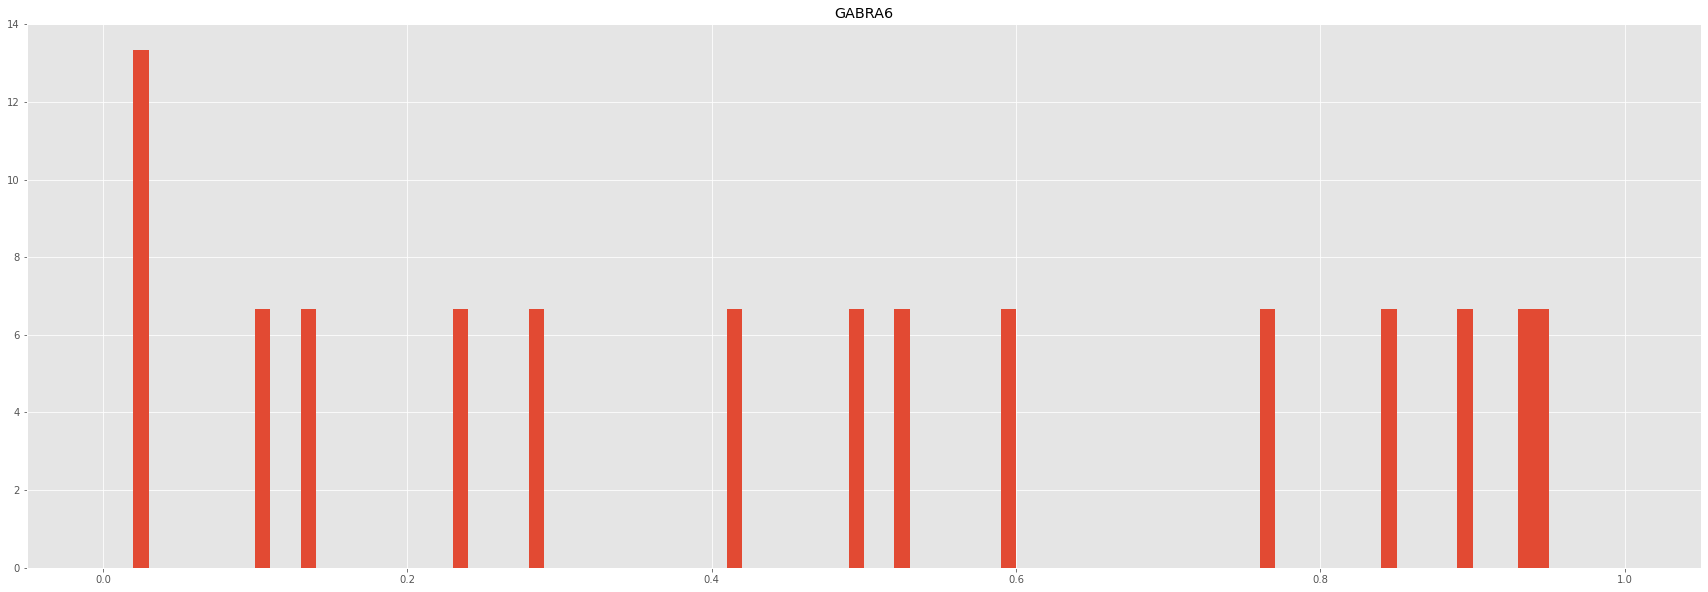

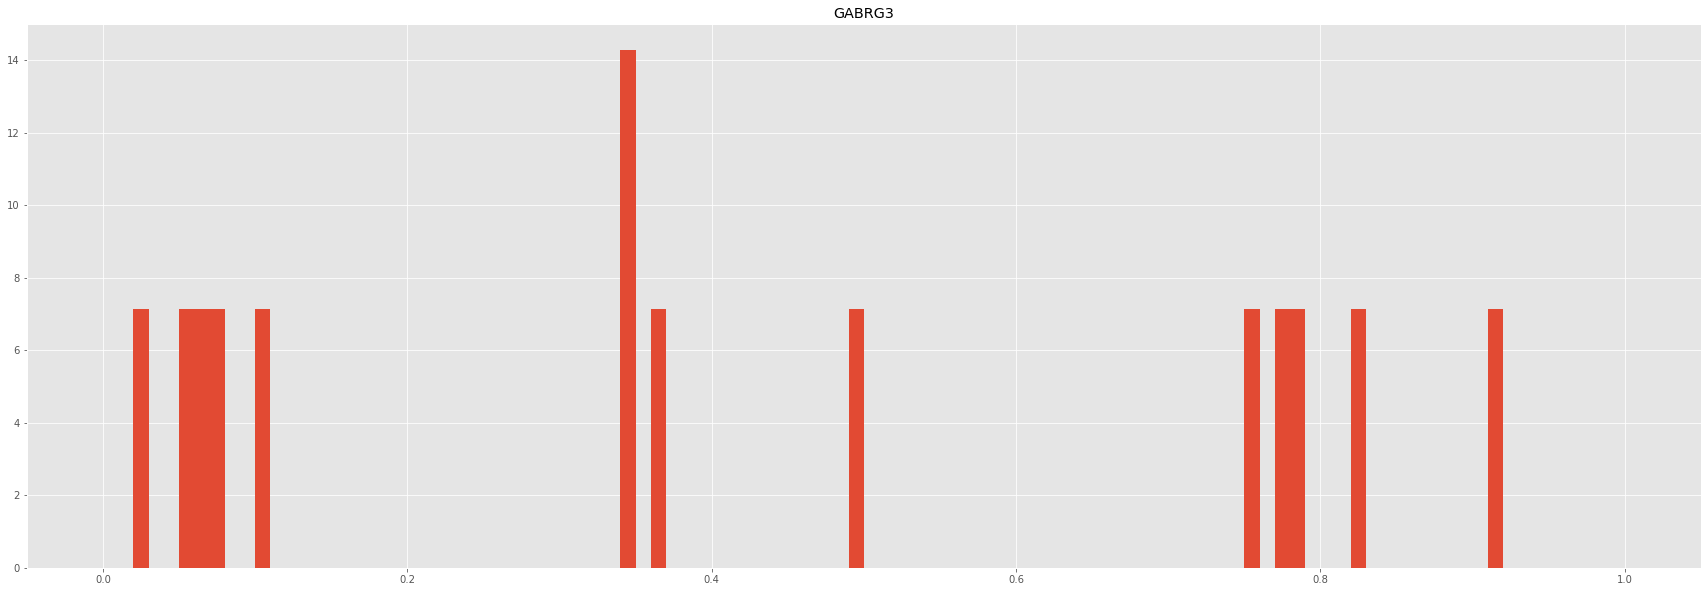

In [69]:
for gene in missense["Gene"].unique():
    pyplot.hist(missense["AA Relative"][missense["Gene"] == gene], bins=[x*0.01 for x in range(0, 101)], density=True)
    pyplot.title(gene)
    pyplot.show()

## Starting the alignment work

### Producing the alignment
The alignment was produced through predicted structures by AlphaFold. The sequences used in the prediction are human reference sequences from UniProt, so the predicted structures should be complete. After fetching all the structures, these were imported into MOE session, where they were aligned. First, a global `optimized for superposition` alignment was performed. After that, sequence before the start of the first beta sheet and the domain between M3 and M4 were separately aligned with `sequence only alignment` option. These parts of structures are highly mobile, but are also less important for the comparison. As such, a sequence-based alignment is good enough.

### Using the alignment

In [70]:
from Bio import AlignIO
from Bio.Seq import Seq

In [71]:
alignment = AlignIO.read("Alignment.aln", "clustal")

In [72]:
print(alignment)

Alignment with 45 rows and 766 columns
-------------------------------MRKSPGLSDCLWA...--- GABRA1
-------------------------------MKTKLNIYNMQFL...--- GABRA2
------MIITQTSHCYMTSLGILFLINILPGTTGQGESRRQEPG...--- GABRA3
-------------------------MVSAKKVPAIALSAGVSFA...--- GABRA4
------------------------MDNGMFSGFIMIKNLLLFCI...--- GABRA5
-----------------------------------------MAS...--- GABRA6
------------------------------------MWTVQNRE...--- GABRB1
-------------------------------------MWRVRKR...--- GABRB2
------------------------------------MWGLAGGR...--- GABRB3
---------MGPLKAFLFSPFLLRSQSRGVRLVFLLLTLHLGNC...--- GABRG1
-------MSSPNIWSTGSSVYSTPVFSQKMTVWILLLLSLYPGF...--- GABRG2
--------------------------MAPKLLLLLCLFSGLHAR...--- GABRG3
---------------------------------MDAPARLLAPL...--- GABRD
--MLSKVLPVLLGILLILQSRVEGPQTESKNEASSRDVVYGPQP...--- GABRE
------------------------------------MNYSLHLA...--- GABRP
--------------MGIRGMLRAAVILLLIRTWLAEGNYPSPIP...--- GABRQ
MLAVPNMRFGIFLLWWGWVLATESRMHWPGREVHEMS

In [73]:
from Bio import AlignIO
from Bio.Seq import Seq
from Bio.SeqUtils import seq1

class Alignment:
    def __init__(self, alignment_file) -> None:
        alignment = AlignIO.read(alignment_file, "clustal")
        self._sequences = {sequence.id: sequence for sequence in alignment}
    
    def convert_to_reference(self, id, acid, number):
        """
        Returns the position in the reference sequence (STARTING FROM 1) if found, else -1.
        """
        if len(acid) == 3:
            acid = seq1(acid)
        sequence = self._sequences[id]
        i = 0
        for j, residue in enumerate(sequence):
            if residue != "-":
                i = i+1
                if i == number:
                    if residue == acid:
                        return j+1
                    else:
                        return -1

In [74]:
ali_class = Alignment("Alignment.aln")

In [75]:
ali_class.convert_to_reference("GABRA1", "T", 20) # Test; should be 51

51

In [76]:
missense.iloc[0][["Gene", "Protein Consequence"]]

Gene                       CHRNA9
Protein Consequence    p.Thr25Met
Name: 63, dtype: object

In [77]:
missense["AA Referenced"] = -1
missense.reset_index(inplace=True)

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
missense["AA Referenced"] = missense.apply(lambda x: ali_class.convert_to_reference(x["Gene"], x["Protein Consequence"].split(".")[1][0:3], x["AA Number"]), axis=1)

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
print(-sum(missense["AA Referenced"][missense["AA Referenced"] == -1]))
print(-sum(missense["AA Referenced"][missense["AA Referenced"] == -1]) / missense.shape[0])

124
0.17893217893217894


For some SNPs the change in reference genome assembly changed the protein change assignment to an incorrect one. We use the GnomeAD v2 assignments in the cases where there is an entry present.

In [86]:
for i in range(0, missense.shape[0]):
    if missense.at[i, "AA Referenced"] == -1:
        if missense.at[i, "rsIDs"] is None:
            x = dataset_alternative[(dataset_alternative["Gene"] == missense.at[i, "Gene"]) & (dataset_alternative["Position"] == missense.at[i, "Position"])]
        else:
            x = dataset_alternative[(dataset_alternative["Gene"] == missense.iloc[i]["Gene"]) & (dataset_alternative["rsIDs"] == missense.at[i, "rsIDs"])]
        if not x.empty and x["Protein Consequence"].any():
            missense.at[i, "AA Referenced"] = ali_class.convert_to_reference(missense.iloc[i]["Gene"],
                                                    x["Protein Consequence"].str.split(".").values.tolist()[0][1][0:3],
                                                    x["Protein Consequence"].str.extract(r"[a-zA-Z]([0-9]+)[a-zA-Z]").astype("int32").values.tolist()[0][0])

In [87]:
print(-sum(missense["AA Referenced"][missense["AA Referenced"] == -1]))
print(-sum(missense["AA Referenced"][missense["AA Referenced"] == -1]) / missense.shape[0])

56
0.08080808080808081


In [88]:
for gene in missense["Gene"].unique():
    print(f"{gene}: {-sum(missense['AA Referenced'][(missense['AA Referenced'] == -1)&(missense['Gene'] == gene)])}")

CHRNA9: 0
CHRNB3: 0
CHRNA1: 0
GABRA2: 1
CHRNA5: 0
GABRG1: 0
GABRA4: 0
CHRNA10: 1
GLRA2: 0
GABRA1: 0
CHRNB4: 4
GABRA5: 0
GABRR1: 0
CHRNG: 0
5HT3D: 1
5HT3C: 0
ZACN: 0
CHRNA3: 1
GABRP: 0
GABRB2: 0
GABRD: 4
GABRB3: 8
CHRNB1: 1
CHRNA2: 0
CHRNA7: 6
CHRNB2: 0
CHRNA6: 0
GABRR2: 0
GABRG2: 13
CHRNE: 4
GLRB: 0
GABRB1: 0
CHRND: 0
GABRA3: 0
5HT3E: 3
CHRNA4: 0
GABRE: 0
GABRR3: 0
5HT3A: 1
GABRQ: 0
GLRA3: 0
GLRA1: 0
5HT3B: 0
GABRA6: 2
GABRG3: 6


In [89]:
for gene in missense["Gene"].unique():
    print(f"{gene}: {-sum(missense['AA Referenced'][(missense['AA Referenced'] == -1)&(missense['Gene'] == gene)]) / sum(missense['Gene'] == gene)}")

CHRNA9: 0.0
CHRNB3: 0.0
CHRNA1: 0.0
GABRA2: 0.2
CHRNA5: 0.0
GABRG1: 0.0
GABRA4: 0.0
CHRNA10: 0.030303030303030304
GLRA2: 0.0
GABRA1: 0.0
CHRNB4: 0.2
GABRA5: 0.0
GABRR1: 0.0
CHRNG: 0.0
5HT3D: 0.03571428571428571
5HT3C: 0.0
ZACN: 0.0
CHRNA3: 0.07692307692307693
GABRP: 0.0
GABRB2: 0.0
GABRD: 0.13793103448275862
GABRB3: 0.8888888888888888
CHRNB1: 0.07142857142857142
CHRNA2: 0.0
CHRNA7: 0.375
CHRNB2: 0.0
CHRNA6: 0.0
GABRR2: 0.0
GABRG2: 0.9285714285714286
CHRNE: 0.16
GLRB: 0.0
GABRB1: 0.0
CHRND: 0.0
GABRA3: 0.0
5HT3E: 0.125
CHRNA4: 0.0
GABRE: 0.0
GABRR3: 0.0
5HT3A: 0.05
GABRQ: 0.0
GLRA3: 0.0
GLRA1: 0.0
5HT3B: 0.0
GABRA6: 0.13333333333333333
GABRG3: 0.42857142857142855


Apparently if we leave this problem be, we will loose some of the genes. Let's check on 5-HT3D if we can solve the problem with accounting for the signal peptide.

In [95]:
subsample = missense[missense["Gene"] == "GABRG2"]
subsample.reset_index(inplace=True)_numbers_id = []
for signal_len in range(0, 45):
    subsample["AA Referenced"] = subsample.apply(lambda x: ali_class.convert_to_reference(x["Gene"], x["Protein Consequence"].split(".")[1][0:3], x["AA Number"]+signal_len), axis=1)
    _numbers_id.append(sum(subsample["AA Referenced"] != -1))
print(subsample.shape[0])
print(_numbers_id)

14
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2]


C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


We have for now 17 % of SNPs where the numbering of amino acid was incorrect. We might reduce this by accounting for the signal peptide and ultimately through manual search. Is this worth it though?

For now we check where we find the variants in the reference sequence.

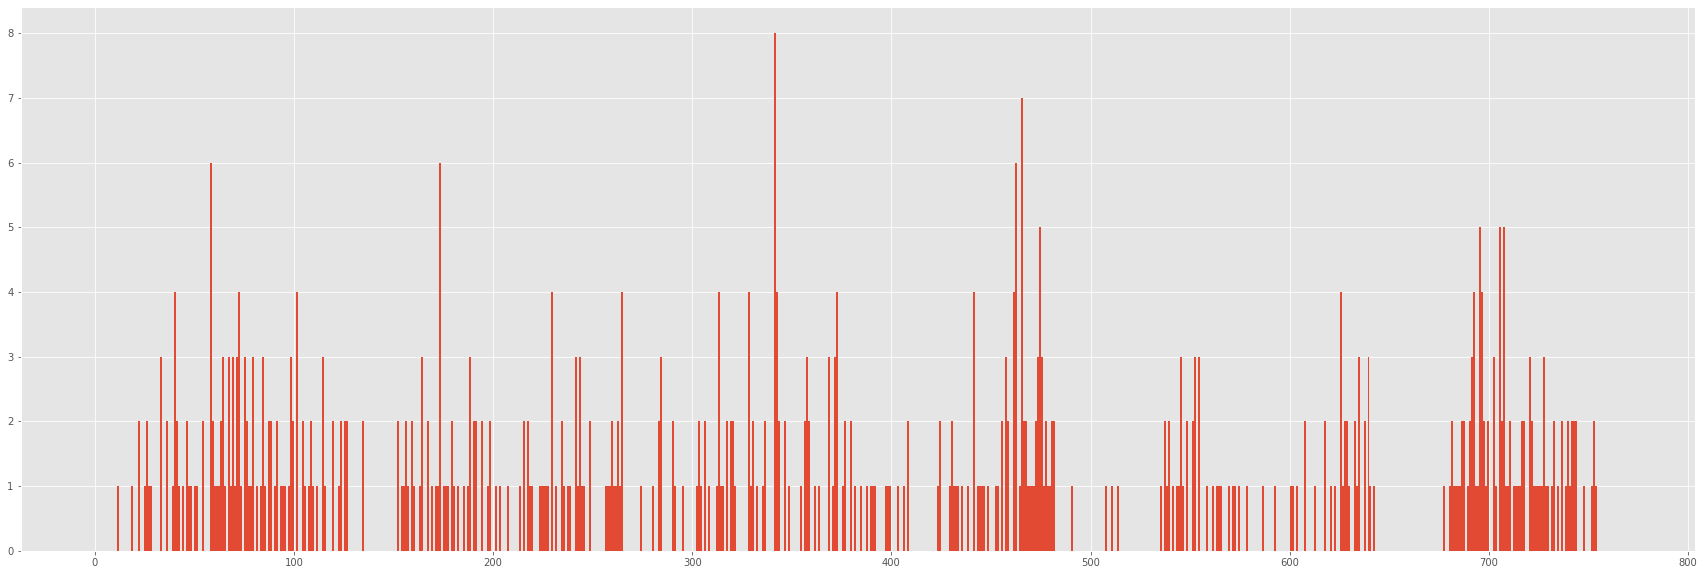

In [38]:
found_missense = missense[missense["AA Referenced"] != -1]
pyplot.hist(found_missense["AA Referenced"], bins=[x for x in range(1, len(alignment[0]))])
pyplot.show()